Els cinc grans trets de personalitat, també coneguts com el model de cinc factors (FFM) i el model OCEAN, és una taxonomia, o agrupació, per als trets de personalitat. Quan s'aplica l'anàlisi de factors (una tècnica estadística) a les dades de l'enquesta de personalitat, algunes paraules utilitzades per descriure aspectes de la personalitat s'apliquen sovint a la mateixa persona. Per exemple, és més probable que algú descrit com a conscient sigui descrit com "sempre preparat" en lloc de "maldestre". Aquesta teoria es basa, per tant, en l'associació entre paraules però no en experiments neuropsicològics. Aquesta teoria utilitza descriptors del llenguatge comú i, per tant, suggereix cinc grans dimensions comunament utilitzades per descriure la personalitat humana i la psique.

La idea és que amb aquest conjunt de dades, que conté respostes de 1-5 (1=Desgrau, 3=Neutral, 5=Acord) a diverses preguntes, es classifiqui cada persona segons els 5 trets del model Big Five, utilitzant un enfocament de classificació que agrupa les persones en categories en funció de les seves puntuacions. Per a això, definirem un llindar per a quantificar la presència de cada tret de personalitat en diferents individus: Baix, Mitjà, Alt. Com quantificarem aquest llindar? Utilitzant percentils. 

Els rags de personalitat corresponen al model dels "Big Five":<br>
    EXT: Extraversió.<br>
    EST: Estabilitat emocional (Neuroticismo invers).<br>
    AGR: Amabilitat.<br>
    CSN: Escrupolositat.<br>
    OPN: Obertura a l'experiència.<br>

1. LIBRARIES IMPORTATION AND DATA READING

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import time

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluación de modelos
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# Análisis de componentes principales (PCA)
from sklearn.decomposition import PCA

# Estadísticas
import statsmodels.api as sm
import matplotlib.pyplot as bplt

In [2]:
dataset = pd.read_csv(f'C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/data-final.csv', delimiter='\t', encoding='utf-8')

### EXPLORATION DATA ANALYSING (EDA)

In [3]:
print("\nMirem descripció general:")
dataset.describe()


Mirem descripció general:


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600884e+02,1.802490e+02,5.104005e+04,2.017864e+04,1.483898e+06,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [4]:
print("Número d'atributs del dataset:", len(dataset.keys()))
print("Número de files en el dataset: ",dataset.shape[0])

print("\nAtributs del dataset i el seu tipus:")
print (dataset.dtypes) 

Número d'atributs del dataset: 110
Número de files en el dataset:  1015341

Atributs del dataset i el seu tipus:
EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object


Com realment no queda clar quin és el significat de cada atribut, crearem un algorisme amb el qual l'usuari pugui comprovar que vol dir cadascun d'ells

In [5]:
"""# Clean text from invisible characters
def cleaning(text):
    # Replace tabs and other invisible characters with spaces
    return text.replace("\t", " ").replace("\n", " ").strip()

# Load the questions and their descriptions into a dictionary
def questions(file):
    qts = {}
    with open(file, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                clean_line = cleaning(line)
                # Split by spaces or tabs to get key and description
                sections = clean_line.split(maxsplit=1)
                if len(sections) == 2:
                    key, description = sections
                    qts[key.strip()] = description.strip()  # Normalize spaces
    return qts

# Look up the meaning of a key
def meaning(questions):
    while True:
        keys = input("Enter the key that you want to know (or type 'leave' to finish): ").strip()
        if keys.lower() == 'leave':
            print("Search finished.")
            break
        elif keys in questions:
            print(f"{keys}: {questions[keys]}")
        else:
            print(f"The key '{keys}' is not in the file. Please try again.")

# Path to the Questions.txt file
file = "C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/Questions.txt"

try:
    # Load the questions
    questions = questions(file)
    print("The questions have been loaded successfully.")
    # Start the interactive search
    meaning(questions)
except FileNotFoundError:
    print(f"The file '{file}' was not found.")
except Exception as e:
    print(f"Error: {e}")
"""

'# Clean text from invisible characters\ndef cleaning(text):\n    # Replace tabs and other invisible characters with spaces\n    return text.replace("\t", " ").replace("\n", " ").strip()\n\n# Load the questions and their descriptions into a dictionary\ndef questions(file):\n    qts = {}\n    with open(file, \'r\', encoding=\'utf-8\') as file:\n        for line in file:\n            if line.strip():  # Ignore empty lines\n                clean_line = cleaning(line)\n                # Split by spaces or tabs to get key and description\n                sections = clean_line.split(maxsplit=1)\n                if len(sections) == 2:\n                    key, description = sections\n                    qts[key.strip()] = description.strip()  # Normalize spaces\n    return qts\n\n# Look up the meaning of a key\ndef meaning(questions):\n    while True:\n        keys = input("Enter the key that you want to know (or type \'leave\' to finish): ").strip()\n        if keys.lower() == \'leave\':\n  

In [6]:
numeric_features = dataset.select_dtypes(np.number).keys()
non_numeric = [k for k in dataset.keys() if k not in numeric_features]
print("Numeric features: ", numeric_features)
print("Non numeric features: ", non_numeric)
print(dataset[non_numeric].dtypes)

Numeric features:  Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'screenw', 'screenh',
       'introelapse', 'testelapse', 'endelapse', 'IPC'],
      dtype='object', length=106)
Non numeric features:  ['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']
dateload                 object
country                  object
lat_appx_lots_of_err     object
long_appx_lots_of_err    object
dtype: object


Miraremos de hacer el cambio de las variables categóricas a numéricas

In [7]:
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)


NÚMERO DE NANS POR COLUMNA:
EXT1           1783
EXT2           1783
EXT3           1783
EXT4           1783
EXT5           1783
               ... 
screenw        2066
screenh        2066
introelapse    2066
testelapse     1783
country          77
Length: 105, dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
EXT1           0.175606
EXT2           0.175606
EXT3           0.175606
EXT4           0.175606
EXT5           0.175606
                 ...   
screenw        0.203478
screenh        0.203478
introelapse    0.203478
testelapse     0.175606
country        0.007584
Length: 105, dtype: float64

COLUMNAS SIN NANS:
['dateload', 'endelapse', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']


Hi ha molts Nans, per tant més endavant haurem de fer canvis. principalment el que farem serà dividir en blocs diferents depenen del significat de la columna. També haurem de comprovar que en les 50 columnes que representen els enunciats als quals los enquestats responen, sol hagi valors del 1-5.

In [8]:
columns_bloc1 = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
           "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
           "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
           "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
           "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]

# Verificar si todos los valores en las columnas están dentro del rango [1, 2, 3, 4, 5]
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc1}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)


Columna: EXT1
Valores únicos: [ 4.  3.  2.  1.  5.  0. nan]
----------------------------------------
Columna: EXT2
Valores únicos: [ 1.  5.  3.  2.  4.  0. nan]
----------------------------------------
Columna: EXT3
Valores únicos: [ 5.  3.  4.  2.  1.  0. nan]
----------------------------------------
Columna: EXT4
Valores únicos: [ 2.  4.  3.  5.  1.  0. nan]
----------------------------------------
Columna: EXT5
Valores únicos: [ 5.  3.  4.  2.  1.  0. nan]
----------------------------------------
Columna: EXT6
Valores únicos: [ 1.  3.  2.  5.  4.  0. nan]
----------------------------------------
Columna: EXT7
Valores únicos: [ 5.  2.  1.  3.  4.  0. nan]
----------------------------------------
Columna: EXT8
Valores únicos: [ 2.  5.  3.  4.  1.  0. nan]
----------------------------------------
Columna: EXT9
Valores únicos: [ 4.  1.  2.  3.  5.  0. nan]
----------------------------------------
Columna: EXT10
Valores únicos: [ 1.  5.  4.  3.  2.  0. nan]
------------------------------

In [9]:
# Reemplazar los valores NaN solo en las columnas de rasgos
for columna in columns_bloc1:
    dataset[columna] = dataset[columna].replace(np.nan, 0)

# Verificar la proporción de NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

unique_values_summary = {col: dataset[col].unique() for col in columns_bloc1}
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)
    

Columna: EXT1
Valores únicos: [4. 3. 2. 1. 5. 0.]
----------------------------------------
Columna: EXT2
Valores únicos: [1. 5. 3. 2. 4. 0.]
----------------------------------------
Columna: EXT3
Valores únicos: [5. 3. 4. 2. 1. 0.]
----------------------------------------
Columna: EXT4
Valores únicos: [2. 4. 3. 5. 1. 0.]
----------------------------------------
Columna: EXT5
Valores únicos: [5. 3. 4. 2. 1. 0.]
----------------------------------------
Columna: EXT6
Valores únicos: [1. 3. 2. 5. 4. 0.]
----------------------------------------
Columna: EXT7
Valores únicos: [5. 2. 1. 3. 4. 0.]
----------------------------------------
Columna: EXT8
Valores únicos: [2. 5. 3. 4. 1. 0.]
----------------------------------------
Columna: EXT9
Valores únicos: [4. 1. 2. 3. 5. 0.]
----------------------------------------
Columna: EXT10
Valores únicos: [1. 5. 4. 3. 2. 0.]
----------------------------------------
Columna: EST1
Valores únicos: [1. 2. 4. 3. 5. 0.]
---------------------------------------

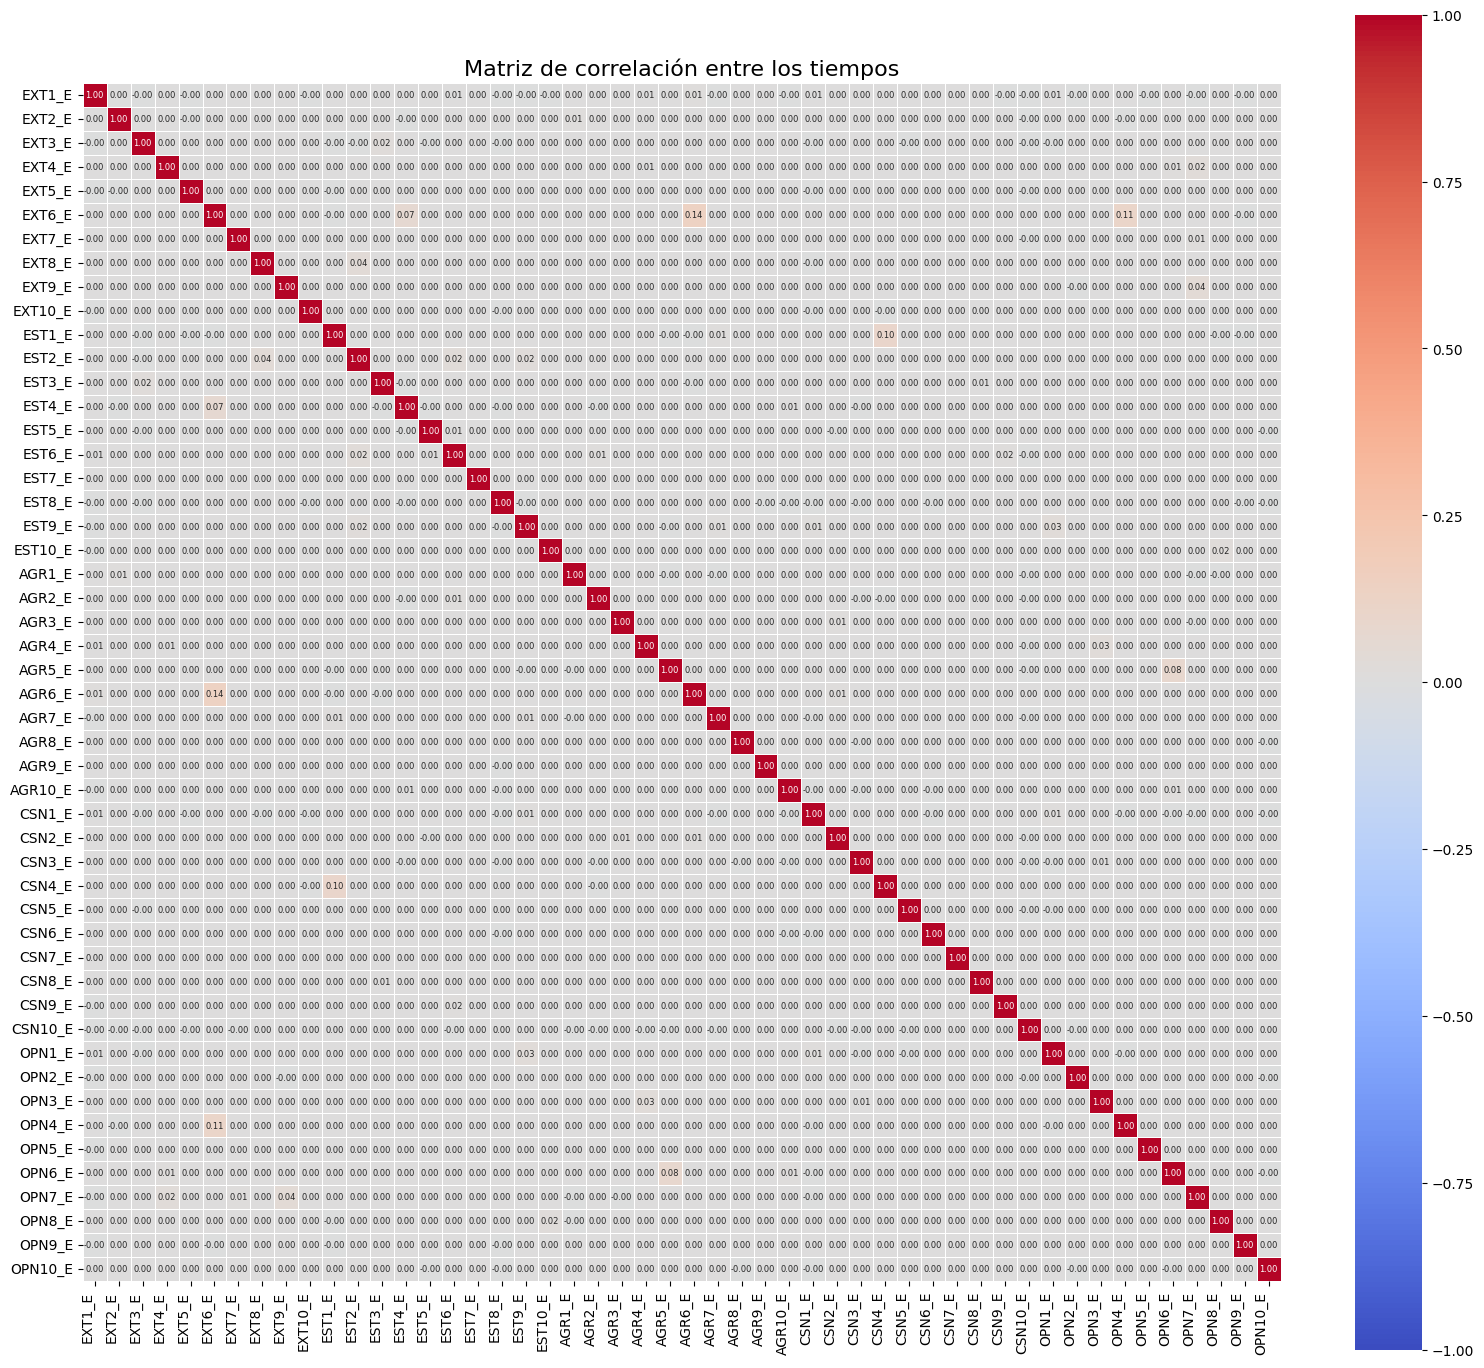

In [10]:
columns_bloc_temps = [
    "EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
    "EST1_E", "EST2_E", "EST3_E", "EST4_E", "EST5_E", "EST6_E", "EST7_E", "EST8_E", "EST9_E", "EST10_E",
    "AGR1_E", "AGR2_E", "AGR3_E", "AGR4_E", "AGR5_E", "AGR6_E", "AGR7_E", "AGR8_E", "AGR9_E", "AGR10_E",
    "CSN1_E", "CSN2_E", "CSN3_E", "CSN4_E", "CSN5_E", "CSN6_E", "CSN7_E", "CSN8_E", "CSN9_E", "CSN10_E",
    "OPN1_E", "OPN2_E", "OPN3_E", "OPN4_E", "OPN5_E", "OPN6_E", "OPN7_E", "OPN8_E", "OPN9_E", "OPN10_E"]

# Seleccionar las columnas de interés
data_temps = dataset[columns_bloc_temps]

correlation_matrix = data_temps.corr()

plt.figure(figsize=(16, 14))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5,
            square=True, vmin=-1, vmax=1, annot_kws={'size': 6})  
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotar las etiquetas del eje Y

plt.title("Matriz de correlación entre los tiempos", fontsize=16)
plt.tight_layout() 
plt.show()

Podem afirmar que no hi ha cap tipus de correlació de los temps de resposta, doncs per tractar els Nans usarem ImputacióSimple altre cop, però com els temps de resposta poden variar significativament entre els participants, en lloc de usar la moda usarem la imputació per mitjana ja que garanteix que els valors imputats no es vegin esbiaixats per temps extrems, preservant així l'estabilitat de les dades.

In [11]:
# Imputación simple
imputer_mode = SimpleImputer(strategy='median')  # Para valores numéricos
dataset.loc[:, columns_bloc_temps] = imputer_mode.fit_transform(dataset[columns_bloc_temps])

In [12]:
dataset.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [13]:
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)

NÚMERO DE NANS POR COLUMNA:
screenw        2066
screenh        2066
introelapse    2066
testelapse     1783
country          77
dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
screenw        0.203478
screenh        0.203478
introelapse    0.203478
testelapse     0.175606
country        0.007584
dtype: float64

COLUMNAS SIN NANS:
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'A

Estrategia que seguiremos para imputar los valores:<br>

introelapse: Imputación por mediana	Preserva la tendencia central en tiempos de respuesta.<br>

testelapse:	Imputación por mediana	Robustez frente a valores extremos en tiempos.<br>

country:	Imputación por moda	La proporción de NaNs es muy baja y es una variable categórica.<br>

lat_appx_lots_of_err:	Eliminar columna	Datos imprecisos y no confiables, además de tener poca utilidad analítica.<br>
long_appx_lots_of_err:	Eliminar columna	Mismo caso que lat_appx_lots_of_err.<br>

screen_size:	Imputación por mediana	Consistente con la naturaleza de distribuciones de tamaños de pantalla.<br>

dateload_time:	Imputación por mediana	Valores faltantes mínimos; la imputación asegura consistencia.<br>

In [14]:
columns_bloc_median = ["introelapse", "testelapse", "screen_size", "dateload_time"]
columns_bloc_moda = ["country"]

# Crear un objeto LabelEncoder
le = LabelEncoder()

dataset['country'] = le.fit_transform(dataset['country'])

dataset['lat_appx_lots_of_err'] = pd.to_numeric(dataset['lat_appx_lots_of_err'], errors='coerce')
dataset['long_appx_lots_of_err'] = pd.to_numeric(dataset['long_appx_lots_of_err'], errors='coerce')


dataset['screen_size'] = dataset['screenh'] * dataset['screenw']
dataset.drop(columns=['screenw', 'screenh'], inplace=True)
dataset.head()

dataset['dateload_spent'] = dataset['dateload'].str.split(' ').str[1]

# Convertir 'dateload_time' en segundos
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

dataset['dateload_time'] = dataset['dateload_spent'].apply(time_to_seconds)

dataset.drop(columns=['dateload', 'dateload_spent'], inplace=True)

dataset.head()

# Imputación simple

imputer_median2 = SimpleImputer(strategy='median')  
dataset.loc[:, columns_bloc_median] = imputer_median2.fit_transform(dataset[columns_bloc_median])


imputer_moda = SimpleImputer(strategy='median') 
dataset.loc[:, columns_bloc_moda] = imputer_moda.fit_transform(dataset[columns_bloc_moda])

dataset = dataset.drop(columns=['lat_appx_lots_of_err', 'long_appx_lots_of_err'])

dataset.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse,IPC,country,screen_size,dateload_time
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3116.0,2992.0,4354.0,9.0,234.0,6,1,69,786432.0,7261
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3374.0,3096.0,3019.0,12.0,179.0,11,1,144,1044480.0,7280
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,6295.0,1585.0,2529.0,3.0,186.0,7,1,69,1049088.0,7316
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4192.0,3480.0,3257.0,186.0,219.0,7,1,69,2304000.0,7322
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5320.0,11401.0,8642.0,8.0,315.0,17,2,103,1049088.0,7377


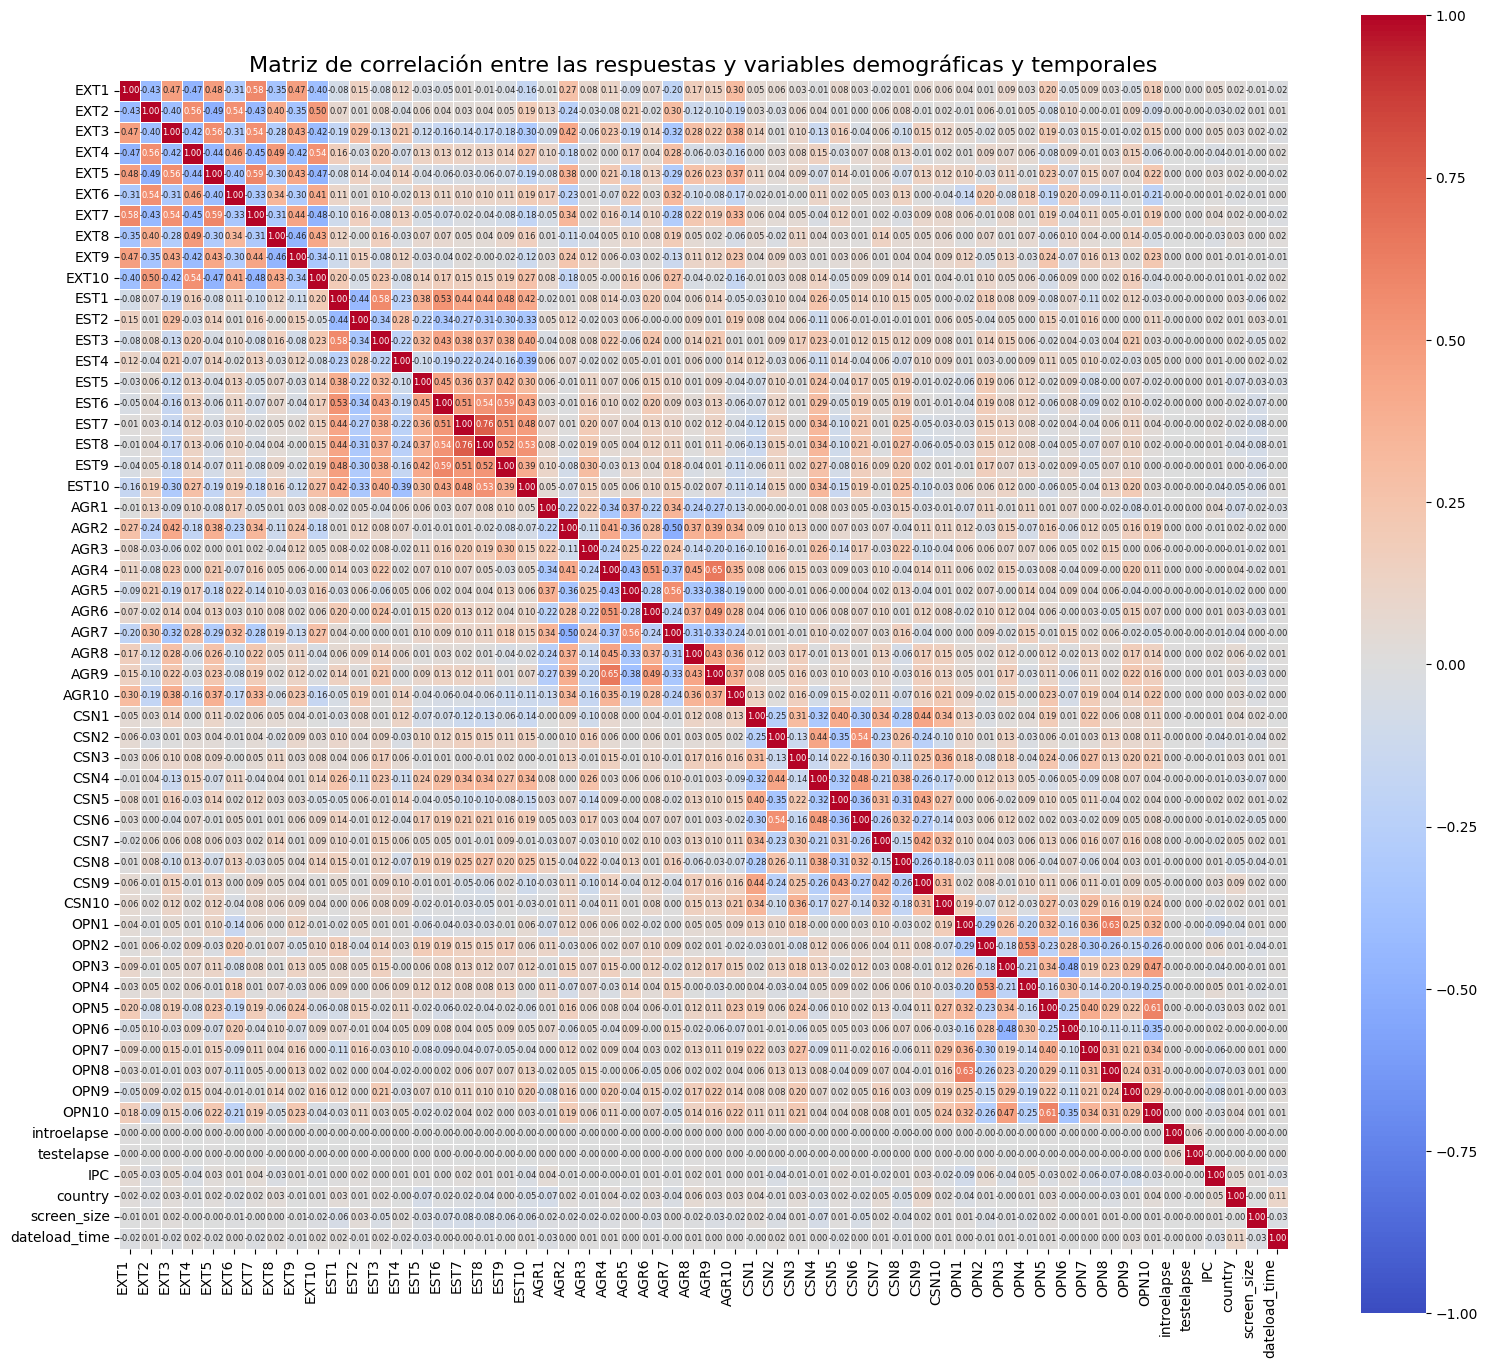

In [15]:
columns_bloc_extra = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
           "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
           "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
           "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
           "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10",
           "introelapse", "testelapse", "IPC", "country", "screen_size", "dateload_time"]

data_extra = dataset[columns_bloc_extra]

correlation_matrix = data_extra.corr()

plt.figure(figsize=(16, 14))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5,
            square=True, vmin=-1, vmax=1, annot_kws={'size': 6}) 

plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotar las etiquetas del eje Y

plt.title("Matriz de correlación entre las respuestas y variables demográficas y temporales", fontsize=16)
plt.tight_layout() 
plt.show()

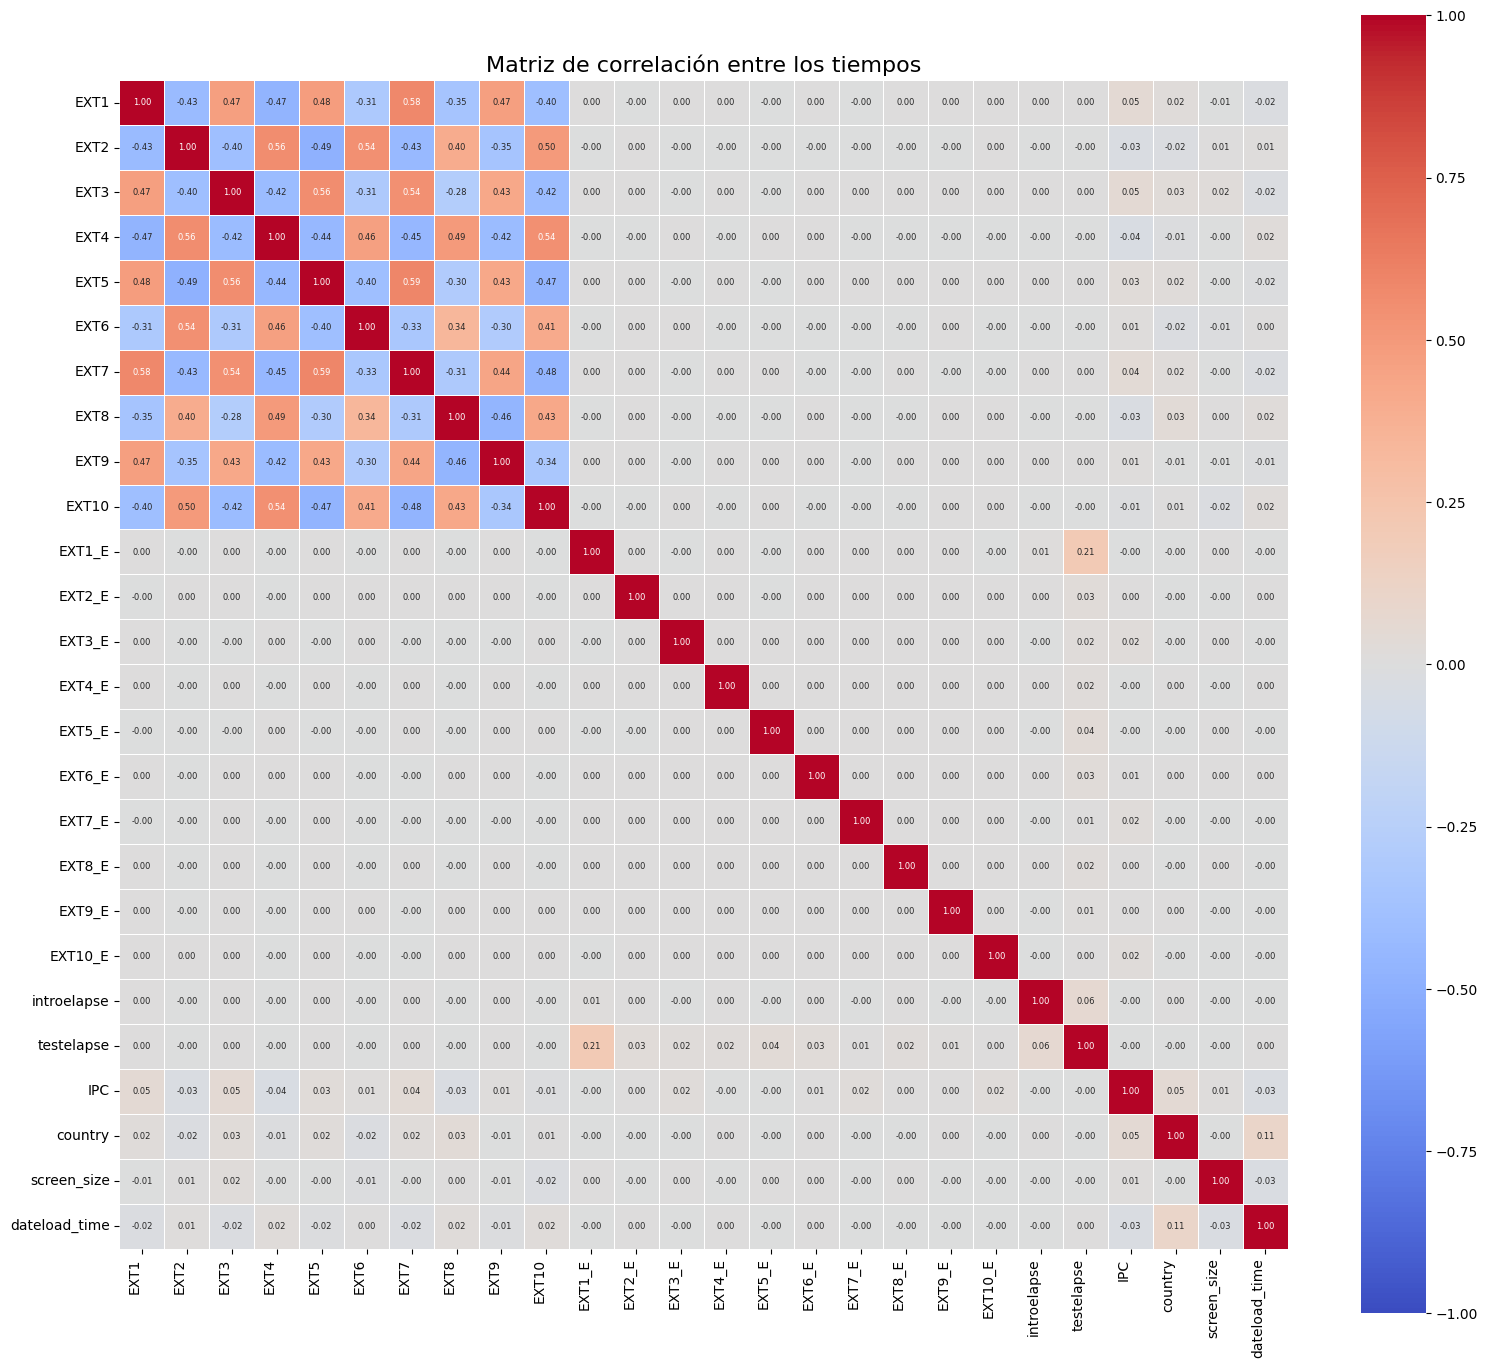

In [16]:
columns_bloc_extra2 = [
           "EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",                     
           "EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
           "introelapse", "testelapse", "IPC", "country", "screen_size", "dateload_time"]

data_extra2 = dataset[columns_bloc_extra2]

correlation_matrix = data_extra2.corr()

plt.figure(figsize=(16, 14)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5,
            square=True, vmin=-1, vmax=1, annot_kws={'size': 6})  

plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotar las etiquetas del eje Y

plt.title("Matriz de correlación entre los tiempos", fontsize=16)
plt.tight_layout()  
plt.show()

Ahora procederemos a crear el umbral para clasificar las diferentes personalidades:

In [17]:
def classify_personality(score):
    if score < 2.75:  
        return "Baja"
    elif 2.75 <= score <= 3.25:  
        return "Media"
    else:  
        return "Alta"

rasgos = {
    'EXT': ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10"],
    'EST': ["EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10"],
    'AGR': ["AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10"],
    'CSN': ["CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10"],
    'OPN': ["OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]}


for rasgo, columnas in rasgos.items():
    if all(col in dataset.columns for col in columnas):
        # Calcular la media excluyendo los ceros (utilizando una máscara booleana para ignorar los ceros)
        dataset[f"{rasgo}_avg"] = dataset[columnas].apply(lambda row: row[row != 0].mean(), axis=1)

# Aplicar clasificación
dataset['EXT_class'] = dataset['EXT_avg'].apply(lambda x: classify_personality(x))
dataset['EST_class'] = dataset['EST_avg'].apply(lambda x: classify_personality(x))
dataset['AGR_class'] = dataset['AGR_avg'].apply(lambda x: classify_personality(x))
dataset['CSN_class'] = dataset['CSN_avg'].apply(lambda x: classify_personality(x))
dataset['OPN_class'] = dataset['OPN_avg'].apply(lambda x: classify_personality(x))

columns_bloc_rasgos = ["EXT_class", "EST_class", "AGR_class", "CSN_class", "OPN_class"]


unique_values_summary = {col: dataset[col].unique() for col in columns_bloc_rasgos}

for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)
    
dataset.head()


Columna: EXT_class
Valores únicos: ['Media' 'Alta' 'Baja']
----------------------------------------
Columna: EST_class
Valores únicos: ['Baja' 'Media' 'Alta']
----------------------------------------
Columna: AGR_class
Valores únicos: ['Media' 'Alta' 'Baja']
----------------------------------------
Columna: CSN_class
Valores únicos: ['Media' 'Baja' 'Alta']
----------------------------------------
Columna: OPN_class
Valores únicos: ['Alta' 'Baja' 'Media']
----------------------------------------


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,EXT_avg,EST_avg,AGR_avg,CSN_avg,OPN_avg,EXT_class,EST_class,AGR_class,CSN_class,OPN_class
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3.0,2.4,3.1,3.2,3.3,Media,Baja,Media,Media,Alta
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3.4,2.1,3.2,3.1,2.7,Alta,Baja,Media,Media,Baja
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2.9,2.6,2.8,2.8,3.1,Media,Baja,Media,Media,Media
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.6,2.7,3.2,2.7,3.1,Baja,Baja,Media,Baja,Media
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,3.5,2.3,3.0,3.2,3.6,Alta,Baja,Media,Media,Alta


In [18]:
class_columns = ['EXT_class', 'EST_class', 'AGR_class', 'CSN_class', 'OPN_class']


label_encoder = LabelEncoder()

# Definir el mapeo manualmente
class_mapping = {'Baja': 0, 'Media': 1, 'Alta': 2}

for col in class_columns:
    dataset[col + '_num'] = dataset[col].map(class_mapping)

dataset.drop(columns=['EXT_class', 'EST_class', 'AGR_class', 'CSN_class', 'OPN_class'], inplace=True)
dataset.drop(columns=['EXT_avg', 'EST_avg', 'AGR_avg', 'CSN_avg', 'OPN_avg'], inplace=True)
dataset.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,endelapse,IPC,country,screen_size,dateload_time,EXT_class_num,EST_class_num,AGR_class_num,CSN_class_num,OPN_class_num
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,6,1,69,786432.0,7261,1,0,1,1,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,11,1,144,1044480.0,7280,2,0,1,1,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,7,1,69,1049088.0,7316,1,0,1,1,1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,7,1,69,2304000.0,7322,0,0,1,0,1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,17,2,103,1049088.0,7377,2,0,1,1,2


C:\Users\adria\AppData\Local\Temp\ipykernel_24612\4214014192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=column, palette="Blues")  # Cambia a una paleta más profesional
C:\Users\adria\AppData\Local\Temp\ipykernel_24612\4214014192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=column, palette="Blues")  # Cambia a una paleta más profesional
C:\Users\adria\AppData\Local\Temp\ipykernel_24612\4214014192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=column, palette="Blues")  

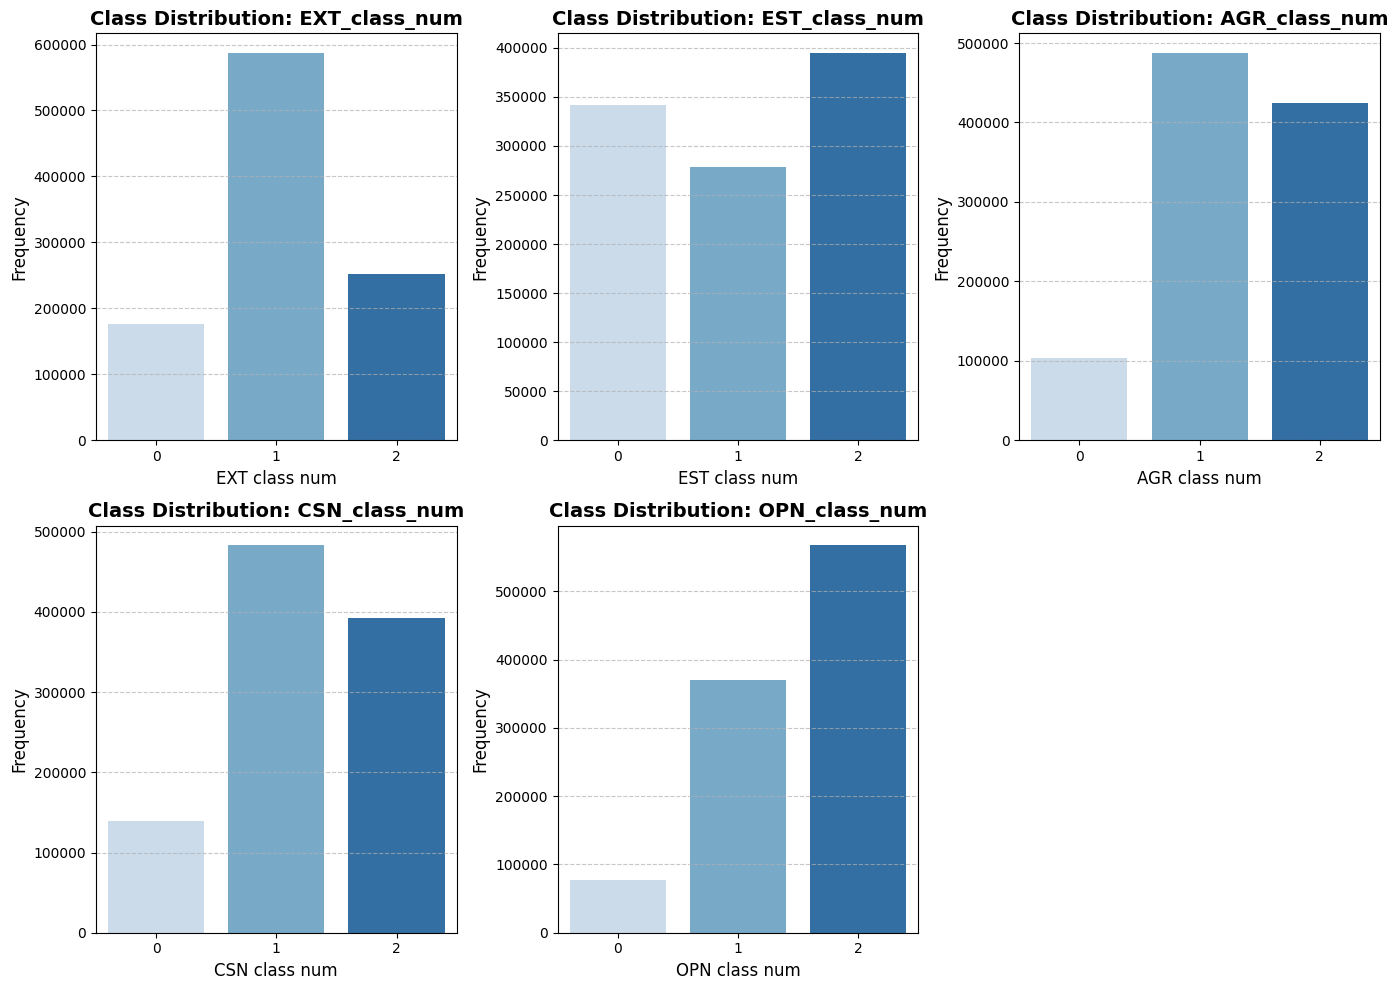

In [19]:
class_columns = ['EXT_class_num', 'EST_class_num', 'AGR_class_num', 'CSN_class_num', 'OPN_class_num']

plt.figure(figsize=(14, 10))  

for i, column in enumerate(class_columns, 1):
    plt.subplot(2, 3, i)  # Crea una subfigura
    sns.countplot(data=dataset, x=column, palette="Blues")  # Cambia a una paleta más profesional
    plt.title(f'Class Distribution: {column}', fontsize=14, fontweight='bold')  # Títulos en negrita
    plt.xlabel(column.replace('_', ' '), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añade una cuadrícula horizontal para claridad

plt.tight_layout()
plt.show()


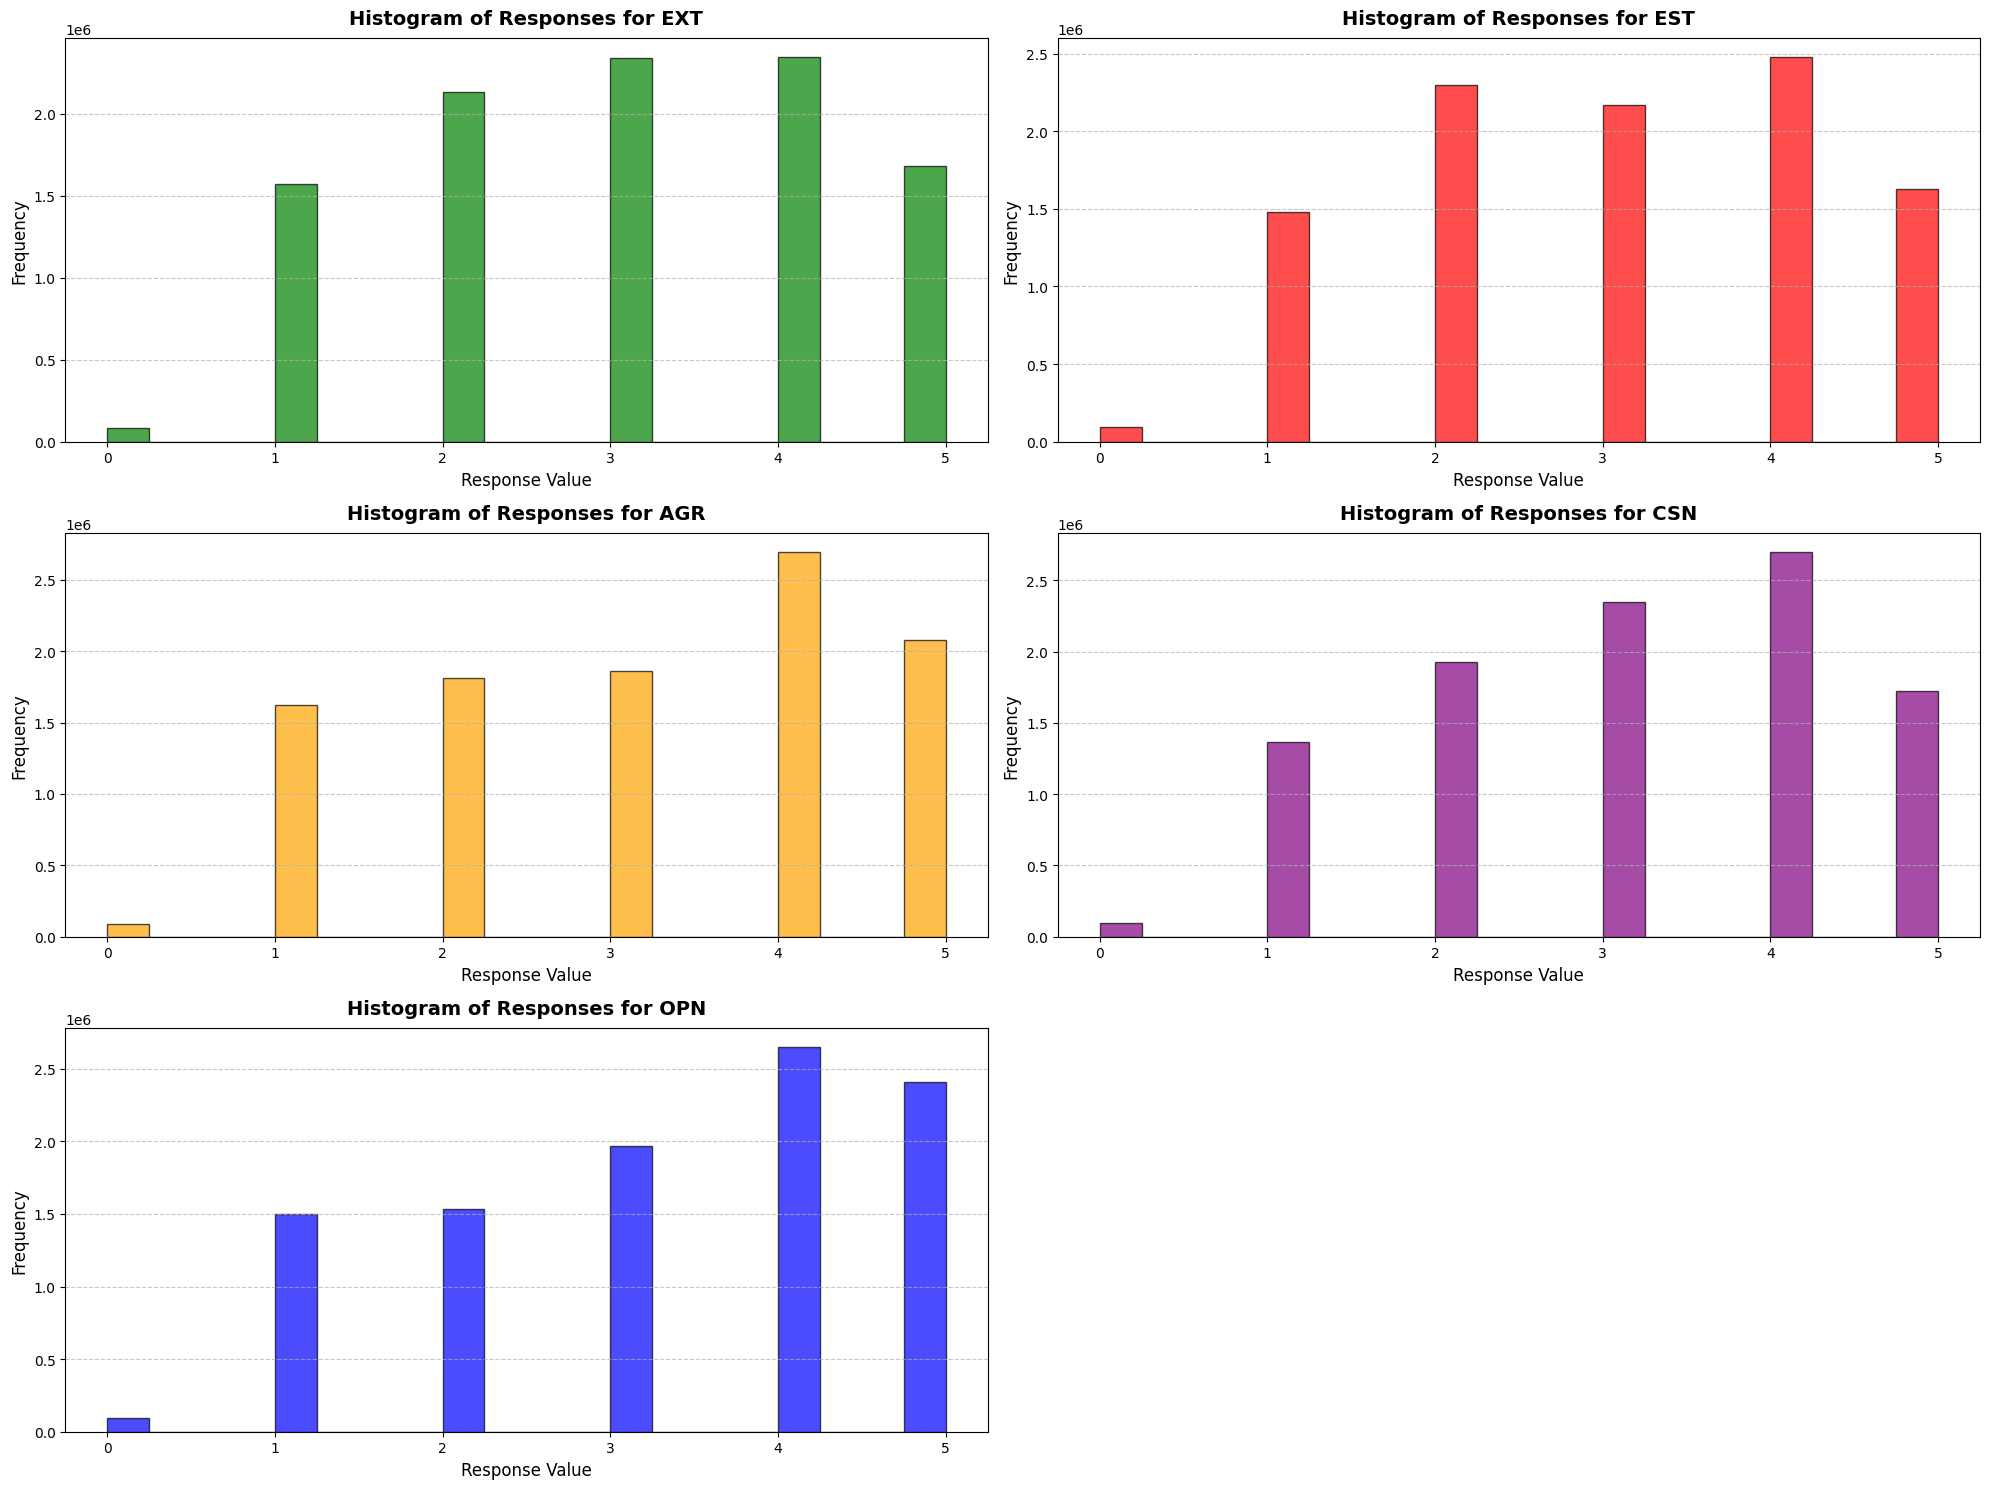

In [20]:
personality_questions = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
                      "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
                      "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
                      "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
                      "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]

custom_colors = ['#0000FF', '#008000', '#FF0000', '#FFA500', '#800080']  # Plateado, Verde, Rojo, Naranja, Morado


plt.figure(figsize=(20, 15)) 

for i, trait in enumerate(['EXT', 'EST', 'AGR', 'CSN', 'OPN'], 1):
    questions = [q for q in personality_questions if q.startswith(trait)]
    
    plt.subplot(3, 2, i)
    dataset[questions].stack().plot(kind='hist', bins=20, alpha=0.7, color=custom_colors[i % len(custom_colors)], edgecolor='black')
    
    plt.title(f'Histogram of Responses for {trait}', fontsize=14, fontweight='bold', loc='center', pad=10)
    
    plt.xlabel('Response Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Podemos ver que las clases están desbalanceadas, cabe mencionar que este desbalanceo por lo general será variable, dependerá del umbral en el que pongamos el límite de cada uno. Debido a este desbalanceo deberemos proceder de distintas formas.

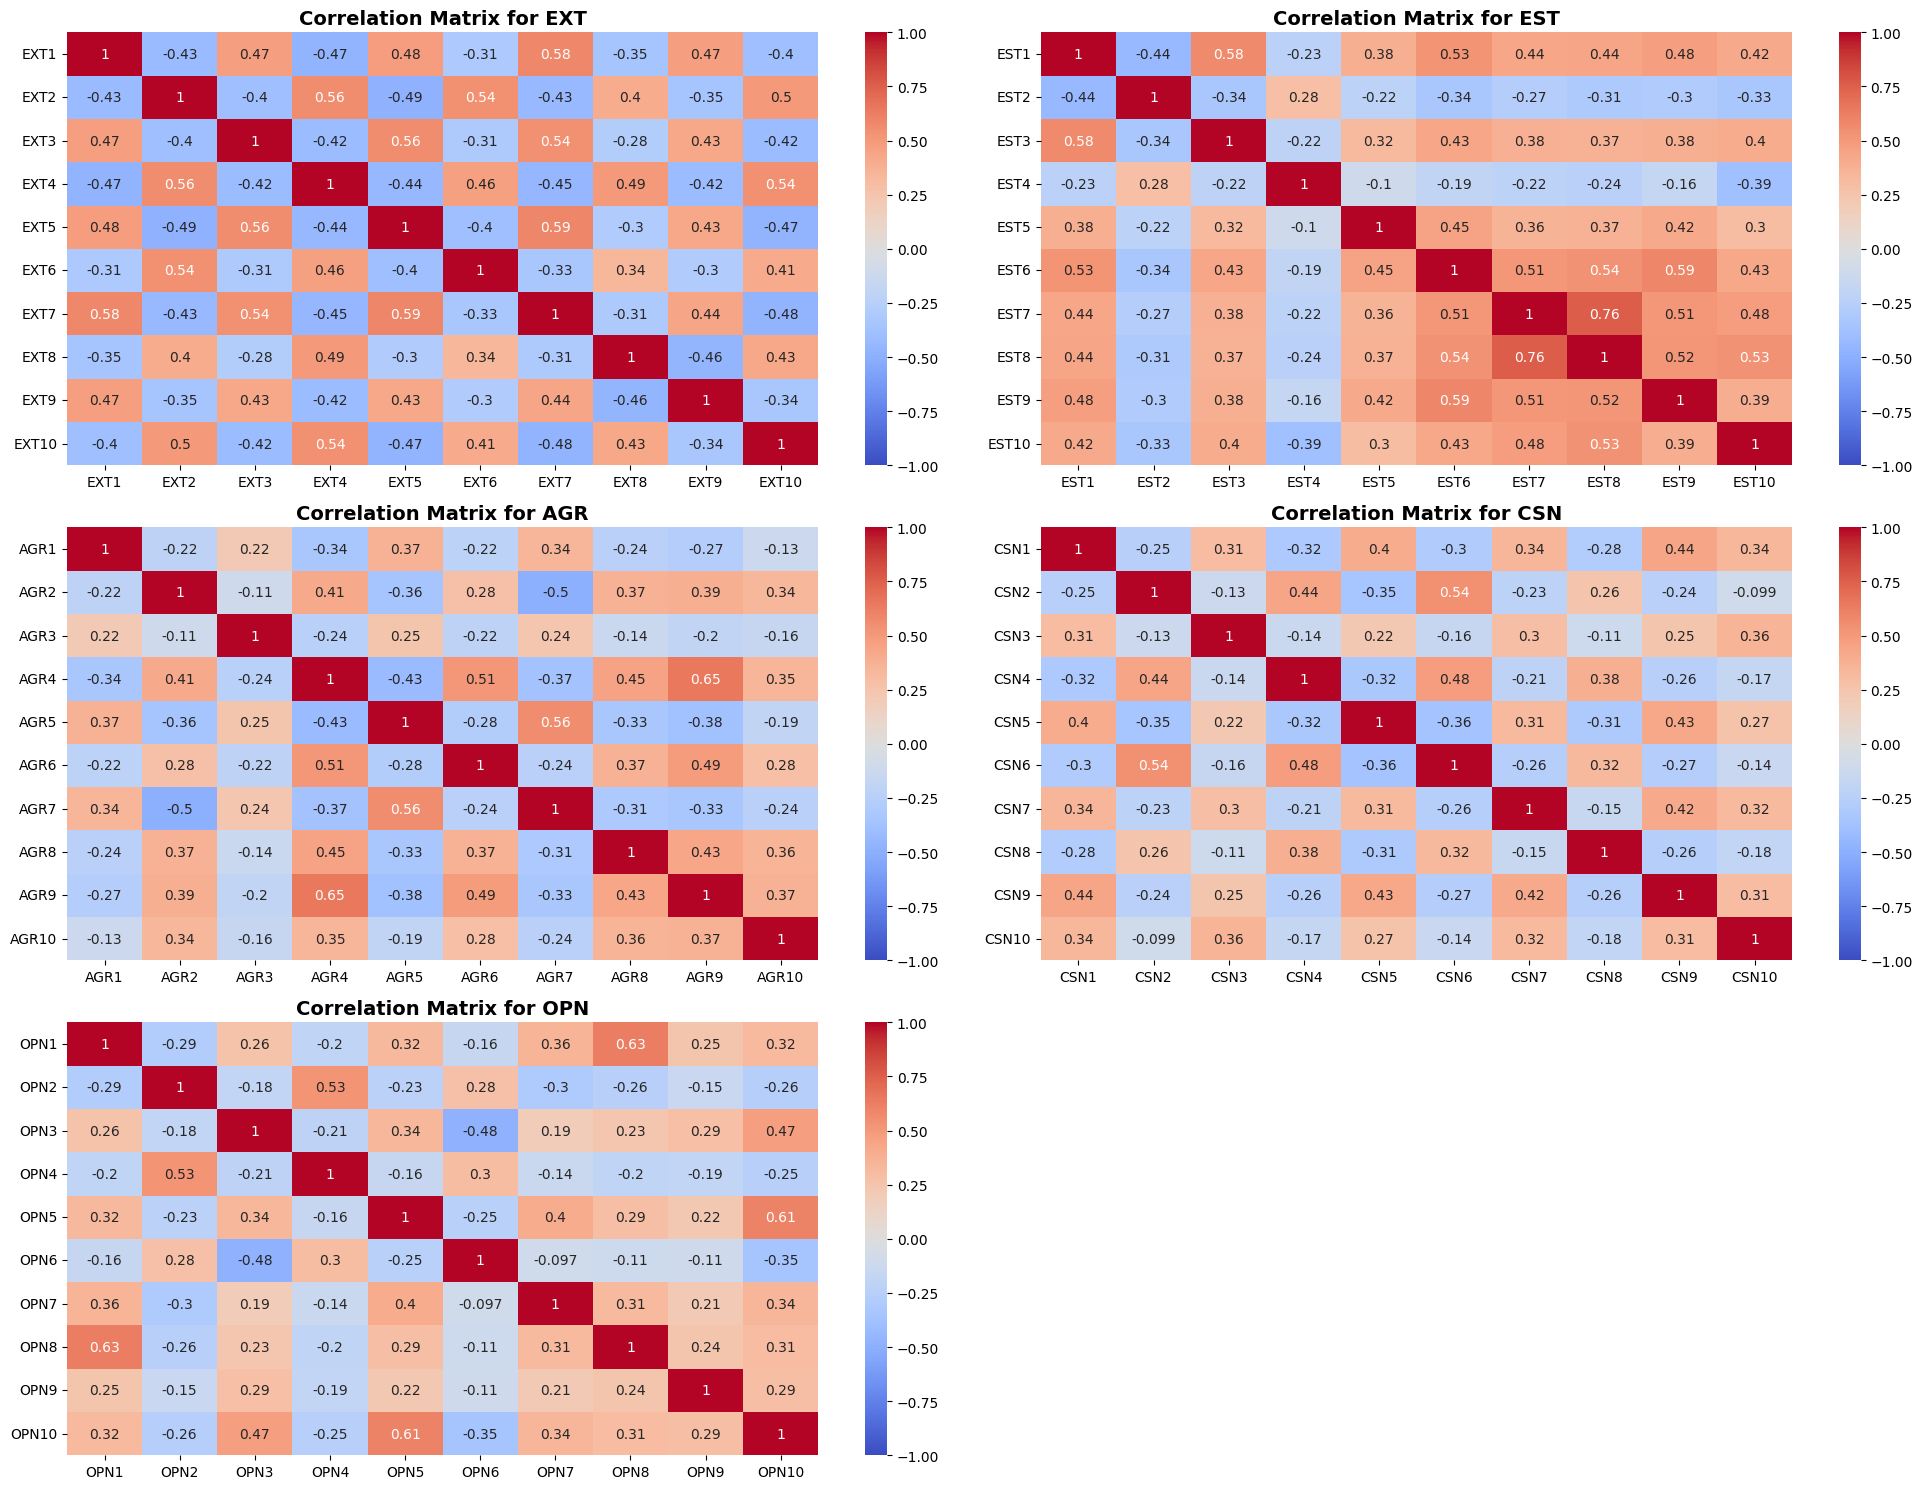

In [21]:
# --- 1. Correlaciones por bloques de preguntas ---
plt.figure(figsize=(20, 15))
for i, trait in enumerate(['EXT', 'EST', 'AGR', 'CSN', 'OPN'], 1):
    questions = [q for q in personality_questions if q.startswith(trait)]
    corr_matrix = dataset[questions].corr()
    
    plt.subplot(3, 2, i)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix for {trait}', color='black', fontsize=14, weight='bold')  # Título más oscuro
plt.tight_layout()
plt.show()


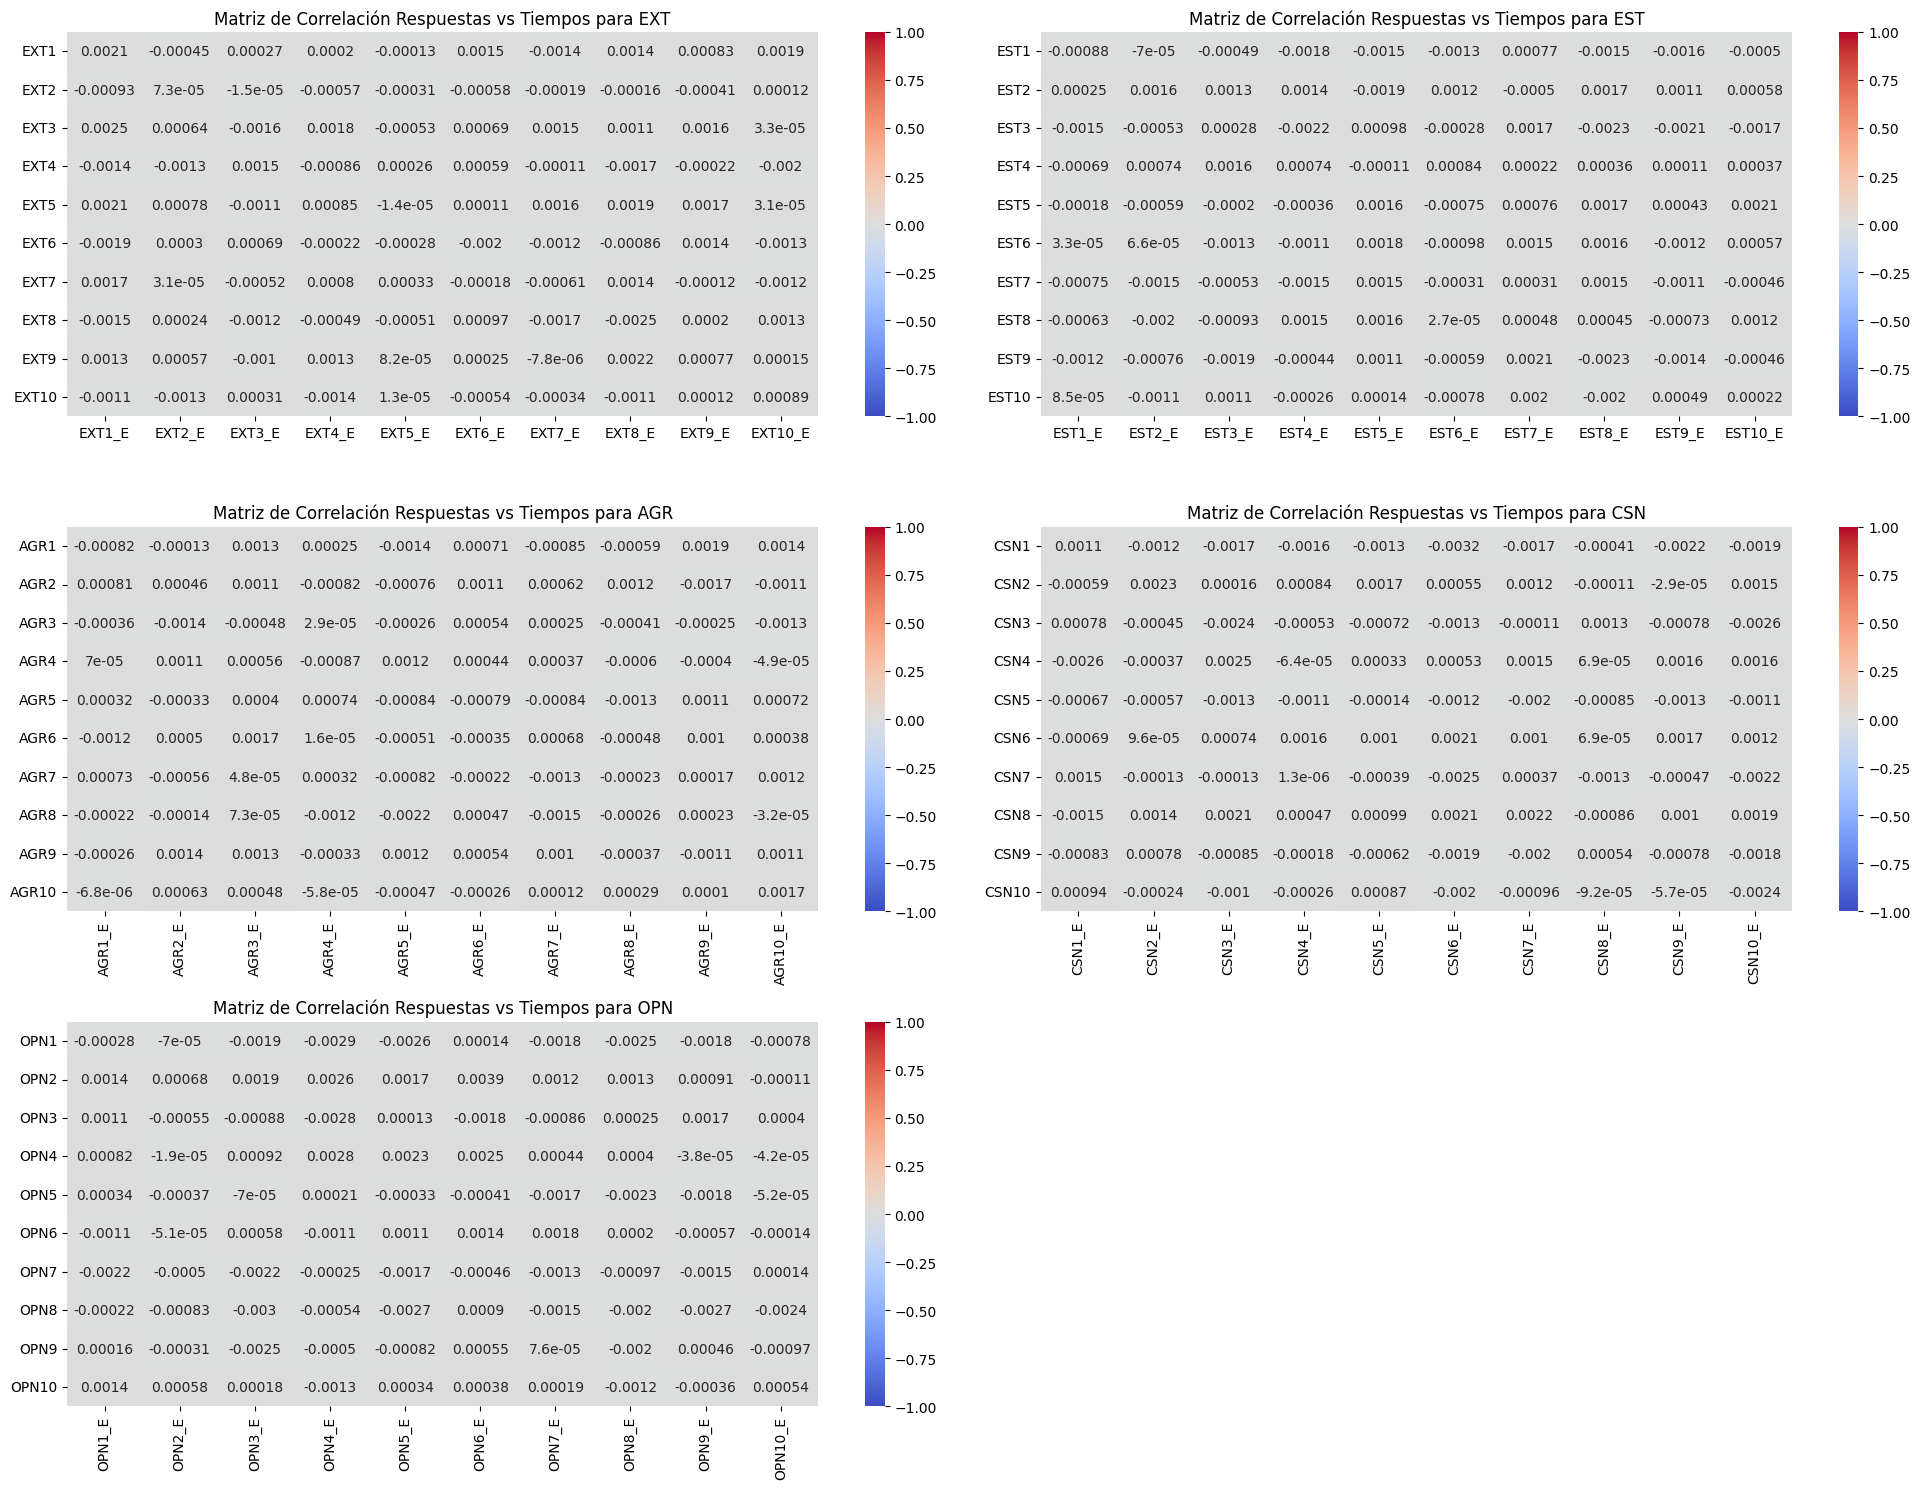

In [22]:
plt.figure(figsize=(20, 15))

for i, trait in enumerate(['EXT', 'EST', 'AGR', 'CSN', 'OPN'], 1):
    questions = [q for q in personality_questions if q.startswith(trait)]
    times = [f"{q}_E" for q in questions]  
    
    valid_columns = [col for col in times if col in dataset.columns]
    
    combined_columns = questions + valid_columns
    corr_matrix = dataset[combined_columns].corr()
    
    plt.subplot(3, 2, i)
    sns.heatmap(corr_matrix.loc[questions, valid_columns], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlación Respuestas vs Tiempos para {trait}')
    
plt.tight_layout()
plt.show()


Veiem que les preguntes de cada bloc están correlacionades peró hi ha molt poca correlació entre les variables de resposta amb el seu temps, per tant, no es té clar que el temps que triga una persona en respondre sigui important.

Ara procedim a comparar les diferents mètriques y així poder seleccionar la més adequada.

In [23]:
# NORMALIZAR POR COLUMNAS

columns_to_normalize = ["EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
                      "EST1_E", "EST2_E", "EST3_E", "EST4_E", "EST5_E", "EST6_E", "EST7_E", "EST8_E", "EST9_E", "EST10_E",
                      "AGR1_E", "AGR2_E", "AGR3_E", "AGR4_E", "AGR5_E", "AGR6_E", "AGR7_E", "AGR8_E", "AGR9_E", "AGR10_E",
                      "CSN1_E", "CSN2_E", "CSN3_E", "CSN4_E", "CSN5_E", "CSN6_E", "CSN7_E", "CSN8_E", "CSN9_E", "CSN10_E",
                      "OPN1_E", "OPN2_E", "OPN3_E", "OPN4_E", "OPN5_E", "OPN6_E", "OPN7_E", "OPN8_E", "OPN9_E", "OPN10_E",
                      "introelapse", "testelapse", "endelapse", "IPC", "country", "screen_size", "dateload_time"]

scaler = StandardScaler()

# Aplicar fit_transform columna por columna
for col in columns_to_normalize:
    dataset[col] = scaler.fit_transform(dataset[[col]])

### METRIC AND MODEL SELECTION

### EXTRAVERSION

In [ ]:
# FEM EL TRAIN,TEST

X = dataset.drop(columns=['EXT_class_num', 'EST_class_num', 'AGR_class_num', 'CSN_class_num', 'OPN_class_num'])  # Quitamos lo que vamos a predecir

# Dividir el conjunto de datos en 5 regresiones diferentes
y_ext = dataset['EXT_class_num']

X_train_ext, X_test_ext,y_train_ext, y_test_ext = train_test_split(X,y_ext,test_size=0.3, random_state = 1)

# Aplicamos PCA para reducir la dimensionalidad
pca = PCA(n_components=0.9, random_state = 1)  
X_train_pca = pca.fit_transform(X_train_ext)
X_test_pca = pca.transform(X_test_ext)


# Paso 2: Entrenamiento del modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_pca, y_train_ext)

# Paso 3: Predicción sobre los datos de prueba
y_pred = model.predict(X_test_pca)

# Paso 4: Evaluación con métricas
# Usamos classification_report para obtener varias métricas como precision, recall, f1-score
print(classification_report(y_test_ext, y_pred))

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.79      0.58      0.67     52615
           1       0.80      0.93      0.86    176443
           2       0.89      0.72      0.80     75545

    accuracy                           0.81    304603
   macro avg       0.83      0.74      0.77    304603
weighted avg       0.82      0.81      0.81    304603



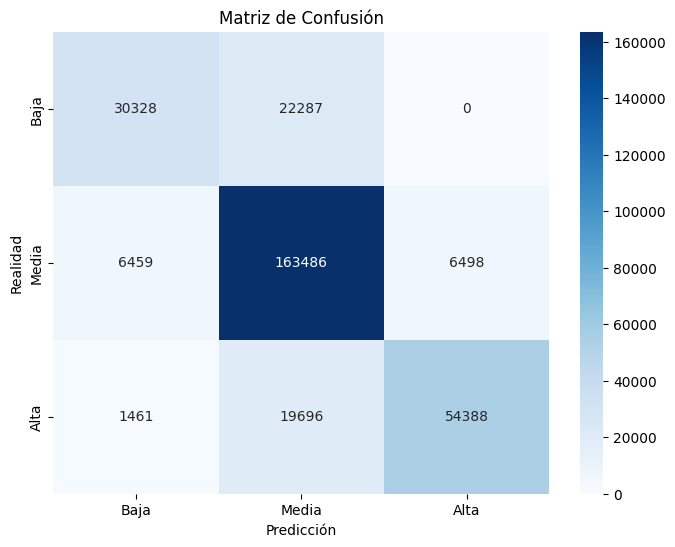

In [ ]:
conf_matrix = confusion_matrix(y_test_ext, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2

def f1_score_comparisonE(models, f1_scores):
    # Crear una paleta de colores con diferentes tonalidades de plateado
    colors = plt.cm.Greys(np.linspace(0.5, 0.9, len(models)))
    
    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color=colors, edgecolor='darkgray', linewidth=1.5)  # Añadimos bordes
    
    plt.xlabel('F1-Score', fontsize=12)
    plt.ylabel('Models', fontsize=12)
    plt.title('Comparison of F1-Score Across Models (PCA Extraversion)', fontsize=14, weight='bold')
    
    for i, v in enumerate(f1_scores):
        plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10, color='black')  # Color negro o más oscuro para los números
    
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Añadir líneas de cuadrícula en el eje X
    plt.tight_layout()
    plt.show()


In [ ]:
models=['Logistic Regression', "Decision Tree", 'Random Forest', 'KNN']
f1_scores=[]

In [ ]:
f1=calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train_pca, y_train_ext, X_test_pca, y_test_ext)
f1_scores.append(f1)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression f1_train: 0.79991
LogisticRegression f1_test: 0.80072


In [ ]:
f1=calculate_f1_score("Decision Tree", DecisionTreeClassifier(), X_train_pca, y_train_ext, X_test_pca, y_test_ext)
f1_scores.append(f1)

In [ ]:
f1=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train_pca, y_train_ext, X_test_pca, y_test_ext)
f1_scores.append(f1)

Random Forest Classifier f1_train: 1.0
Random Forest Classifier f1_test: 0.71093


In [ ]:
f1=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(), X_train_pca, y_train_ext, X_test_pca, y_test_ext)
f1_scores.append(f1)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNeighbors Classifier f1_train: 0.76578
KNeighbors Classifier f1_test: 0.65754


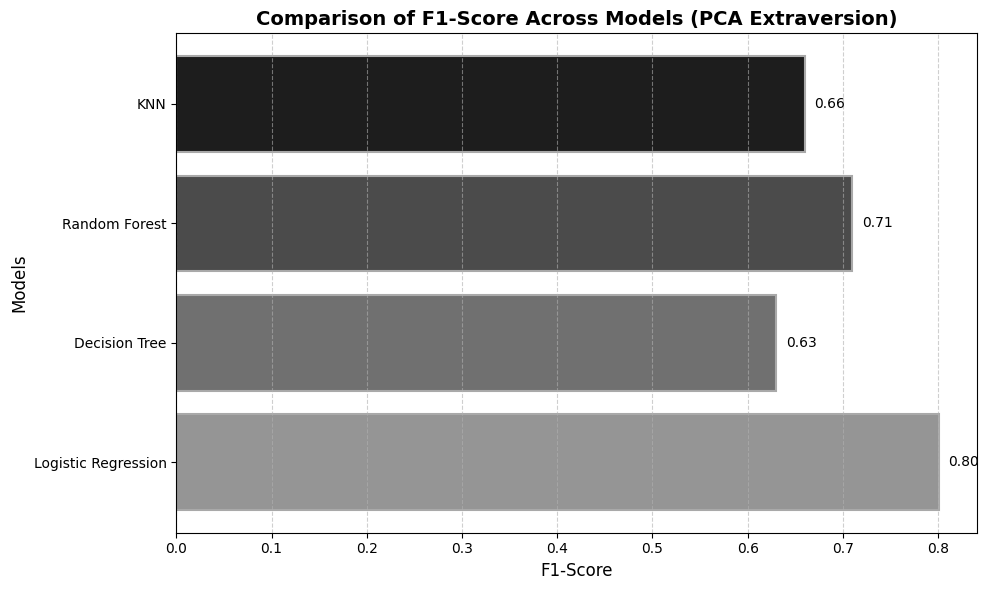

In [ ]:
f1_scores.append(0.80072)
f1_scores.append(0.63)
f1_scores.append(0.71)
f1_scores.append(0.66)
f1_score_comparisonE(models, f1_scores)

### SIN PCA

In [25]:
# FEM EL TRAIN,TEST

X = dataset.drop(columns=['EXT_class_num', 'EST_class_num', 'AGR_class_num', 'CSN_class_num', 'OPN_class_num'])  # Quitamos lo que vamos a predecir

# Dividir el conjunto de datos en 5 regresiones diferentes
y_ext = dataset['EXT_class_num']

X_train_ext, X_test_ext,y_train_ext, y_test_ext = train_test_split(X,y_ext,test_size=0.3, random_state = 1)

# Paso 2: Entrenamiento del modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_ext, y_train_ext)

# Paso 3: Predicción sobre los datos de prueba
y_pred_ext = model.predict(X_test_ext)

# Paso 4: Evaluación con métricas
# Usamos classification_report para obtener varias métricas como precision, recall, f1-score
print(classification_report(y_test_ext, y_pred_ext))

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.66      0.73     52615
           1       0.85      0.94      0.89    176443
           2       0.94      0.83      0.88     75545

    accuracy                           0.87    304603
   macro avg       0.87      0.81      0.83    304603
weighted avg       0.87      0.87      0.86    304603



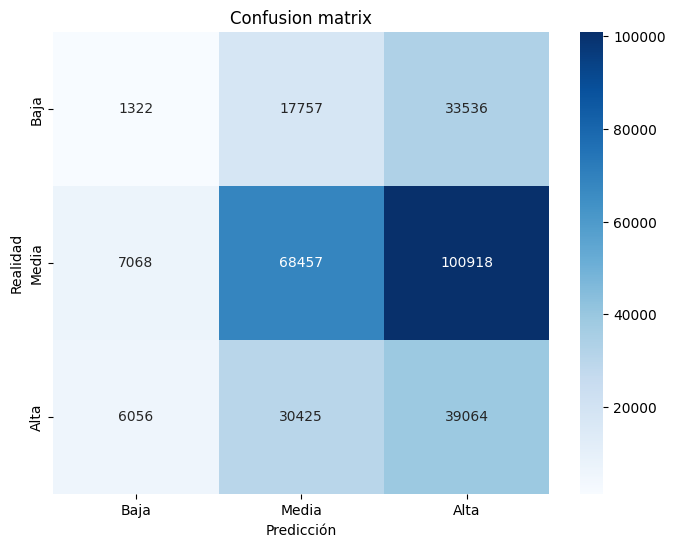

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_ext, y_pred_ext)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Confusion matrix')
plt.show()

In [ ]:
models=['Logistic Regression', "Decision Tree", 'Random Forest', 'KNN']
f1_scores_sin_pca=[]

In [ ]:
def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2

In [ ]:
f1_sin_pca = calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores_sin_pca.append(f1_sin_pca)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression f1_train: 0.79309
LogisticRegression f1_test: 0.79182


In [ ]:
f1_sin_pca=calculate_f1_score("Decision Tree", DecisionTreeClassifier(), X_train_ext, y_train_ext,X_test_ext, y_test_ext)
f1_scores_sin_pca.append(f1_sin_pca)

Decision Tree f1_train: 1.0
Decision Tree f1_test: 0.82137


In [ ]:
f1_sin_pca=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores_sin_pca.append(f1_sin_pca)

Random Forest Classifier f1_train: 1.0
Random Forest Classifier f1_test: 0.83229


In [ ]:
f1_sin_pca=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores_sin_pca.append(f1_sin_pca)

KNeighbors Classifier f1_train: 0.7627
KNeighbors Classifier f1_test: 0.6559


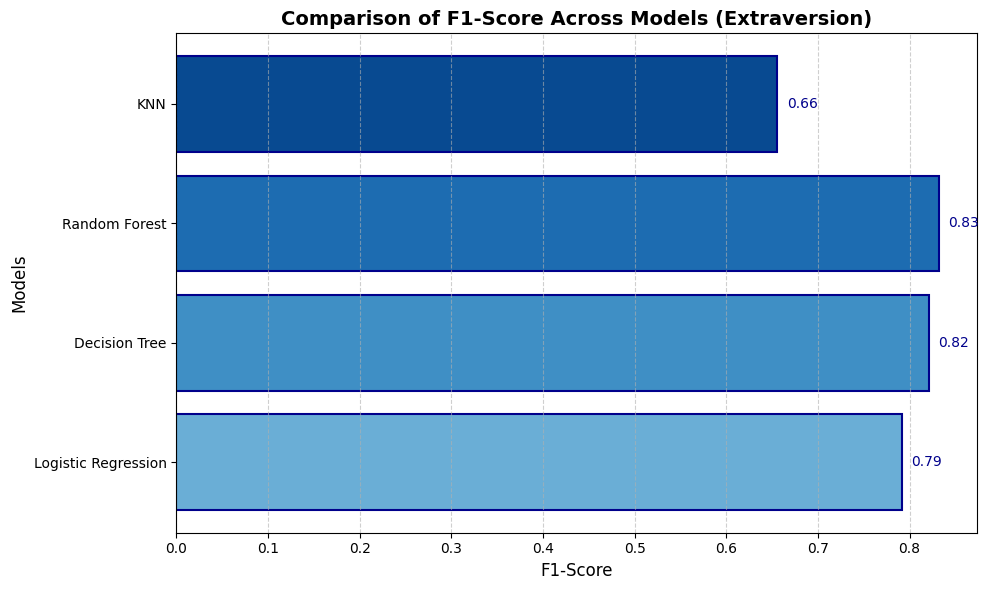

In [ ]:
f1_score_comparisonE(models, f1_scores_sin_pca)

### NEUROTICISM

In [ ]:
# Dividir el conjunto de datos en 5 regresiones diferentes
y_est = dataset['EST_class_num']

X_train_est, X_test_est,y_train_est, y_test_est = train_test_split(X,y_est,test_size=0.3, random_state = 1)

# Paso 2: Entrenamiento del modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_est, y_train_est)

# Paso 3: Predicción sobre los datos de prueba
y_pred_est = model.predict(X_test_est)

# Paso 4: Evaluación con métricas
# Usamos classification_report para obtener varias métricas como precision, recall, f1-score
print(classification_report(y_test_est, y_pred_est))

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.90      0.90    103062
           1       0.77      0.77      0.77     83551
           2       0.91      0.91      0.91    117990

    accuracy                           0.87    304603
   macro avg       0.86      0.86      0.86    304603
weighted avg       0.87      0.87      0.87    304603



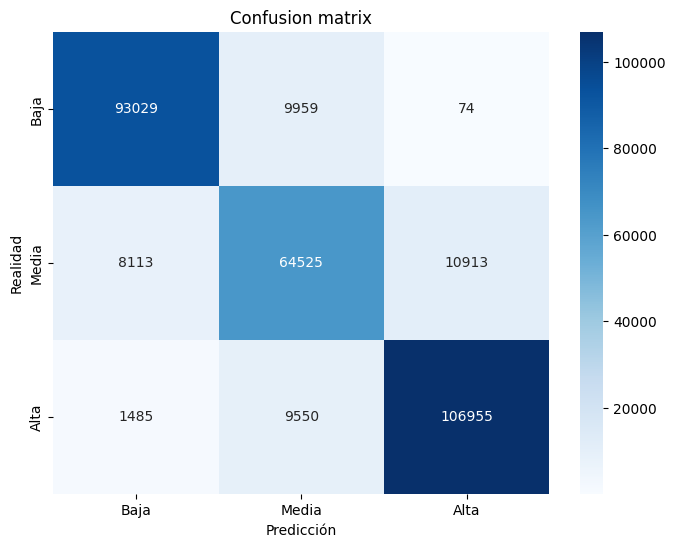

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_est, y_pred_est)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Confusion matrix')
plt.show()

In [ ]:
def f1_score_comparisonN(models, f1_scores):
    # Crear una paleta de colores con diferentes tonalidades de verde
    colors = plt.cm.Greens(np.linspace(0.5, 0.9, len(models)))
    
    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color=colors, edgecolor='darkgreen', linewidth=1.5)  # Añadimos bordes
    
    plt.xlabel('F1-Score', fontsize=12)
    plt.ylabel('Models', fontsize=12)
    plt.title('Comparison of F1-Score Across Models (Neuroticism)', fontsize=14, weight='bold')
    
    # Añadir los valores encima de las barras
    for i, v in enumerate(f1_scores):
        plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10, color='black')
    
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Añadir líneas de cuadrícula en el eje X
    plt.tight_layout()
    plt.show()
    
def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2

In [ ]:
f1=calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train_est, y_train_est, X_test_est, y_test_est)
f1_scores.append(f1)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression f1_train: 0.85249
LogisticRegression f1_test: 0.85174


In [ ]:
f1=calculate_f1_score("Decision Tree", DecisionTreeClassifier(), X_train_est, y_train_est, X_test_est, y_test_est)
f1_scores.append(f1)

Decision Tree f1_train: 1.0
Decision Tree f1_test: 0.86531


In [ ]:
f1=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train_est, y_train_est, X_test_est, y_test_est)
f1_scores.append(f1)

Random Forest Classifier f1_train: 1.0
Random Forest Classifier f1_test: 0.89313


In [ ]:
f1=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(), X_train_est, y_train_est, X_test_est, y_test_est)
f1_scores.append(f1)

KNeighbors Classifier f1_train: 0.88516
KNeighbors Classifier f1_test: 0.81538


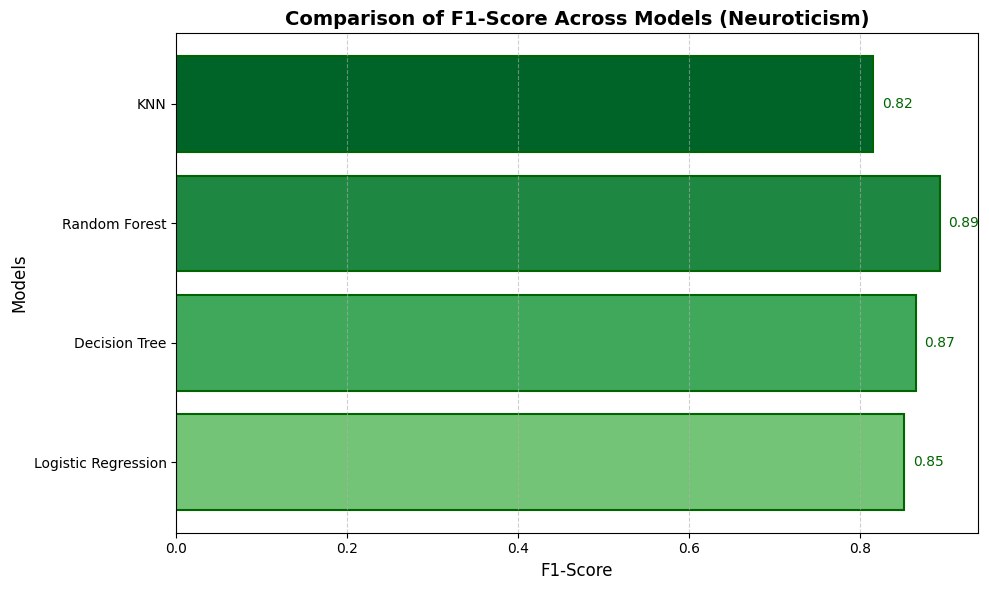

In [ ]:
f1_score_comparisonN(models, f1_scores)

### Agreeableness

In [26]:
# Dividir el conjunto de datos en 5 regresiones diferentes
y_agr = dataset['AGR_class_num']

X_train_agr, X_test_agr,y_train_agr, y_test_agr = train_test_split(X,y_agr,test_size=0.3, random_state = 1)

# Paso 2: Entrenamiento del modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_agr, y_train_agr)

# Paso 3: Predicción sobre los datos de prueba
y_pred_agr = model.predict(X_test_agr)

# Paso 4: Evaluación con métricas
# Usamos classification_report para obtener varias métricas como precision, recall, f1-score
print(classification_report(y_test_agr, y_pred_agr))

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.74      0.52      0.61     30952
           1       0.84      0.91      0.87    146516
           2       0.93      0.92      0.93    127135

    accuracy                           0.87    304603
   macro avg       0.84      0.78      0.81    304603
weighted avg       0.87      0.87      0.87    304603



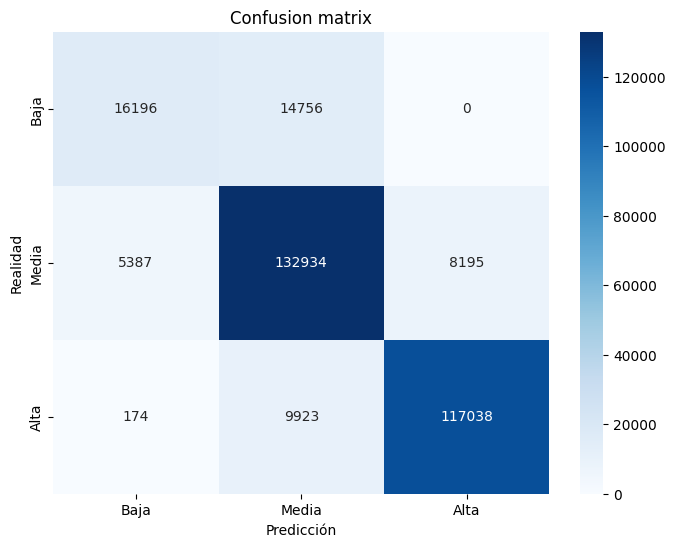

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_agr, y_pred_agr)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Confusion matrix')
plt.show()

In [ ]:
def f1_score_comparisonA(models, f1_scores):
    # Crear una paleta de colores con diferentes tonalidades de rojo
    colors = plt.cm.Reds(np.linspace(0.5, 0.9, len(models)))
    
    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color=colors, edgecolor='darkred', linewidth=1.5)  # Añadimos bordes
    
    plt.xlabel('F1-Score', fontsize=12)
    plt.ylabel('Models', fontsize=12)
    plt.title('Comparison of F1-Score Across Models (Agreeableness)', fontsize=14, weight='bold')
    
    # Añadir los valores encima de las barras
    for i, v in enumerate(f1_scores):
        plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10, color='black')
    
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Añadir líneas de cuadrícula en el eje X
    plt.tight_layout()
    plt.show()
    
def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2

In [ ]:
f1_scores_agr = []
f1_agr =calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train_agr, y_train_agr,X_test_agr, y_test_agr)
f1_scores_agr.append(f1_agr)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression f1_train: 0.79655
LogisticRegression f1_test: 0.79561


In [ ]:
f1_agr=calculate_f1_score("Decision Tree", DecisionTreeClassifier(), X_train_agr, y_train_agr,X_test_agr, y_test_agr)
f1_scores_agr.append(f1_agr)

Decision Tree f1_train: 1.0
Decision Tree f1_test: 0.8533


In [ ]:
f1_agr=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train_agr, y_train_agr,X_test_agr, y_test_agr)
f1_scores_agr.append(f1_agr)

Random Forest Classifier f1_train: 1.0
Random Forest Classifier f1_test: 0.85607


In [ ]:
f1_agr=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(), X_train_agr, y_train_agr,X_test_agr, y_test_agr)
f1_scores_agr.append(f1_agr)

KNeighbors Classifier f1_train: 0.7993
KNeighbors Classifier f1_test: 0.69807


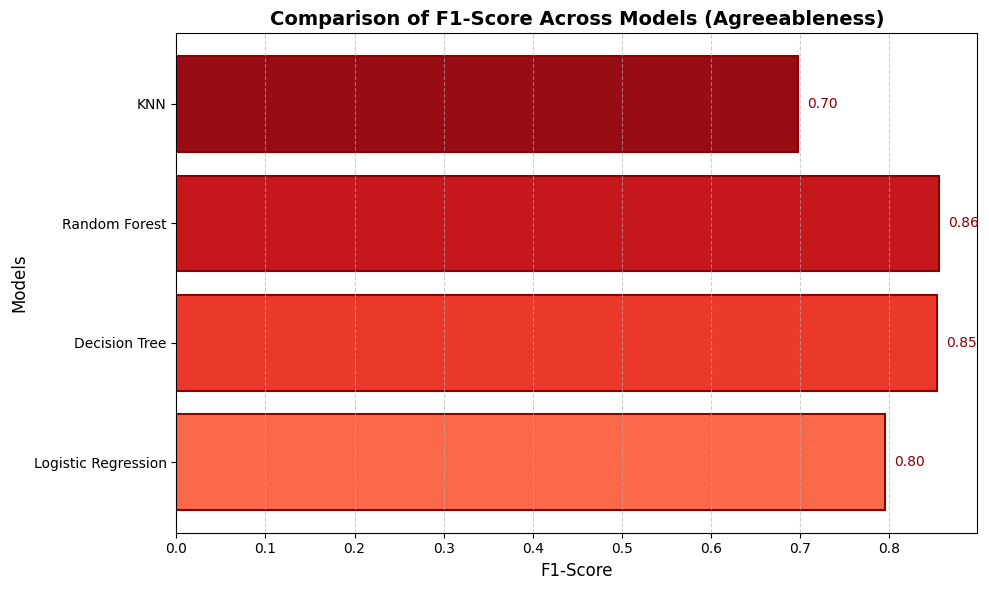

In [ ]:
f1_scores_agr = []
f1_scores_agr.append(0.79561)
f1_scores_agr.append(0.8533)
f1_scores_agr.append(0.85607)
f1_scores_agr.append(0.69807)
f1_score_comparisonA(models, f1_scores_agr)

### Conscientiousness

In [29]:
# Dividir el conjunto de datos en 5 regresiones diferentes
y_csn = dataset['CSN_class_num']

X_train_csn, X_test_csn,y_train_csn, y_test_csn = train_test_split(X,y_csn,test_size=0.3, random_state = 1)

# Paso 2: Entrenamiento del modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_csn, y_train_csn)

# Paso 3: Predicción sobre los datos de prueba
y_pred_csn = model.predict(X_test_csn)

# Paso 4: Evaluación con métricas
# Usamos classification_report para obtener varias métricas como precision, recall, f1-score
print(classification_report(y_test_csn, y_pred_csn))

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.77      0.59      0.67     41739
           1       0.83      0.91      0.87    144793
           2       0.93      0.91      0.92    118071

    accuracy                           0.86    304603
   macro avg       0.84      0.80      0.82    304603
weighted avg       0.86      0.86      0.86    304603



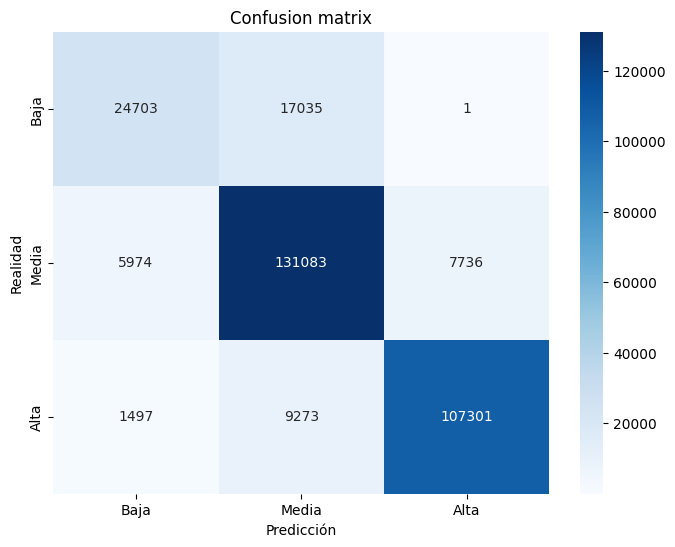

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_csn, y_pred_csn)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Confusion matrix')
plt.show()

In [ ]:
def f1_score_comparisonC(models, f1_scores):
    # Crear una paleta de colores con diferentes tonalidades de amarillo
    colors = plt.cm.YlOrBr(np.linspace(0.5, 0.9, len(models)))  # Paleta de tonos amarillo-naranja
    
    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color=colors, edgecolor='goldenrod', linewidth=1.5)  # Bordes en tonos dorados
    
    # Etiquetas de los ejes
    plt.xlabel('F1-Score', fontsize=12)
    plt.ylabel('Models', fontsize=12)
    plt.title('Comparison of F1-Score Across Models (Conscientiousness)', fontsize=14, weight='bold')
    
    # Añadir los valores encima de las barras
    for i, v in enumerate(f1_scores):
        plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10, color='black')  # Texto oscuro para visibilidad
    
    # Cuadrícula y diseño general
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Cuadrícula sutil en el eje X
    plt.tight_layout()  # Ajustar el diseño
    plt.show()

def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2

f1_scores_csn = []

In [ ]:
f1_csn=calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train_csn, y_train_csn,X_test_csn, y_test_csn)
f1_scores_csn.append(f1_csn)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression f1_train: 0.8273
LogisticRegression f1_test: 0.82641


In [ ]:
f1_csn=calculate_f1_score("Decision Tree", DecisionTreeClassifier(), X_train_csn, y_train_csn,X_test_csn, y_test_csn)
f1_scores_csn.append(f1_csn)

Decision Tree f1_train: 1.0
Decision Tree f1_test: 0.81251


In [ ]:
f1_csn=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train_csn, y_train_csn,X_test_csn, y_test_csn)
f1_scores_csn.append(f1_csn)

Random Forest Classifier f1_train: 1.0
Random Forest Classifier f1_test: 0.84313


In [ ]:
f1_csn=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(), X_train_csn, y_train_csn,X_test_csn, y_test_csn)
f1_scores_csn.append(f1_csn)

KNeighbors Classifier f1_train: 0.79864
KNeighbors Classifier f1_test: 0.68764


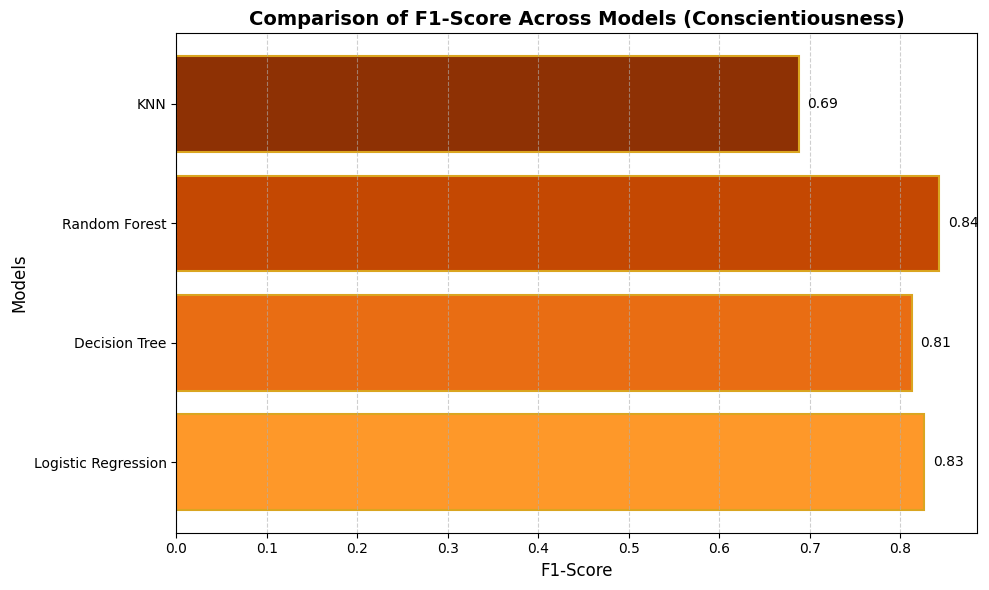

In [ ]:
models=['Logistic Regression', "Decision Tree", 'Random Forest', 'KNN']
f1_scores_csn.append(0.82641)
f1_scores_csn.append(0.81251)
f1_scores_csn.append(0.84313)
f1_scores_csn.append(0.68764)
f1_score_comparisonC(models, f1_scores_csn)

### Openness

In [ ]:
# Dividir el conjunto de datos en 5 regresiones diferentes
y_opn = dataset['OPN_class_num']

X_train_opn, X_test_opn,y_train_opn, y_test_opn = train_test_split(X,y_opn,test_size=0.3, random_state = 1)

# Paso 2: Entrenamiento del modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_opn, y_train_opn)

# Paso 3: Predicción sobre los datos de prueba
y_pred_opn = model.predict(X_test_opn)

# Paso 4: Evaluación con métricas
# Usamos classification_report para obtener varias métricas como precision, recall, f1-score
print(classification_report(y_test_opn, y_pred_opn))

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.75      0.46      0.57     23358
           1       0.81      0.85      0.83    110949
           2       0.92      0.94      0.93    170296

    accuracy                           0.87    304603
   macro avg       0.83      0.75      0.78    304603
weighted avg       0.87      0.87      0.87    304603



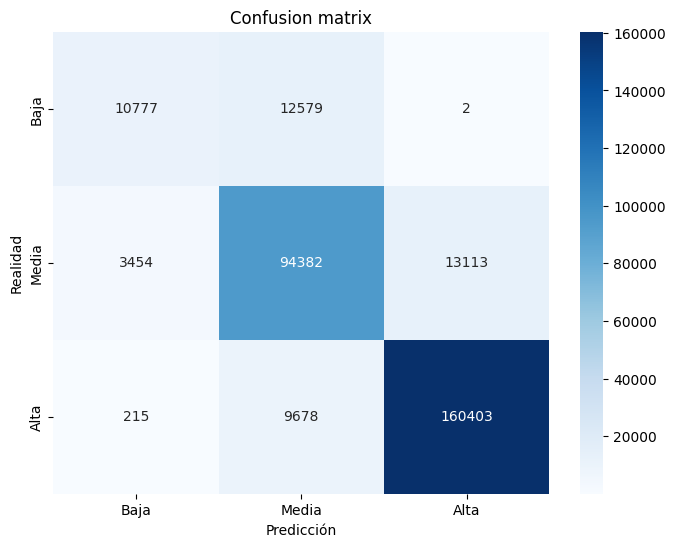

In [ ]:
conf_matrix = confusion_matrix(y_test_opn, y_pred_opn)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Confusion matrix')
plt.show()

In [ ]:
def f1_score_comparisonO(models, f1_scores):
    # Crear una paleta de colores con diferentes tonalidades de morado
    colors = plt.cm.Purples(np.linspace(0.5, 0.9, len(models)))  # Tonalidades de morado

    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color=colors, edgecolor='indigo', linewidth=1.5)  # Bordes índigo oscuro

    # Etiquetas de los ejes
    plt.xlabel('F1-Score', fontsize=12)
    plt.ylabel('Models', fontsize=12)
    plt.title('Comparison of F1-Score Across Models (Openness)', fontsize=14, weight='bold')

    # Añadir los valores encima de las barras (fuera)
    for i, v in enumerate(f1_scores):
        plt.text(v + 0.02, i, f"{v:.2f}", va='center', fontsize=10, weight='black') 

    # Cuadrícula y diseño general
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Cuadrícula en el eje X
    plt.tight_layout()  # Asegura que todo esté bien alineado
    plt.show()
    
def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2
    


f1_scores_opn = []

In [ ]:
f1_opn=calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train_opn, y_train_opn,X_test_opn, y_test_opn)
f1_scores_opn.append(f1_opn)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression f1_train: 0.8037
LogisticRegression f1_test: 0.80377


In [ ]:
f1_opn=calculate_f1_score("Decision Tree", DecisionTreeClassifier(), X_train_opn, y_train_opn,X_test_opn, y_test_opn)
f1_scores_opn.append(f1_opn)

Decision Tree f1_train: 1.0
Decision Tree f1_test: 0.87825


In [ ]:
f1_opn=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train_opn, y_train_opn,X_test_opn, y_test_opn)
f1_scores_opn.append(f1_opn)

Random Forest Classifier f1_train: 1.0
Random Forest Classifier f1_test: 0.87148


In [ ]:
f1_opn=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(), X_train_opn, y_train_opn,X_test_opn, y_test_opn)
f1_scores_opn.append(f1_opn)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNeighbors Classifier f1_train: 0.83648
KNeighbors Classifier f1_test: 0.75168


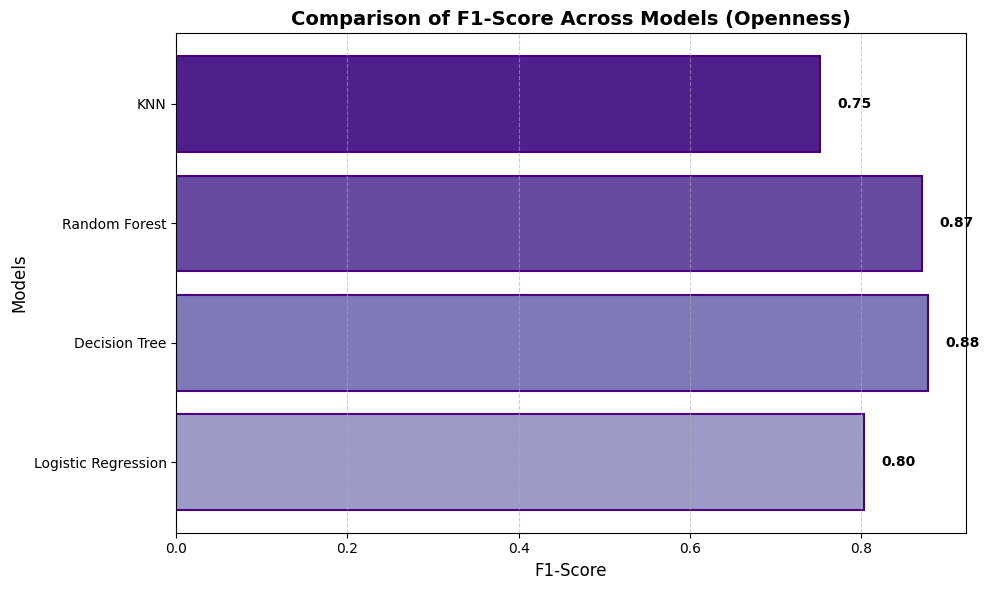

In [ ]:
models=['Logistic Regression', "Decision Tree", 'Random Forest', 'KNN']
f1_score_comparisonO(models, f1_scores_opn)

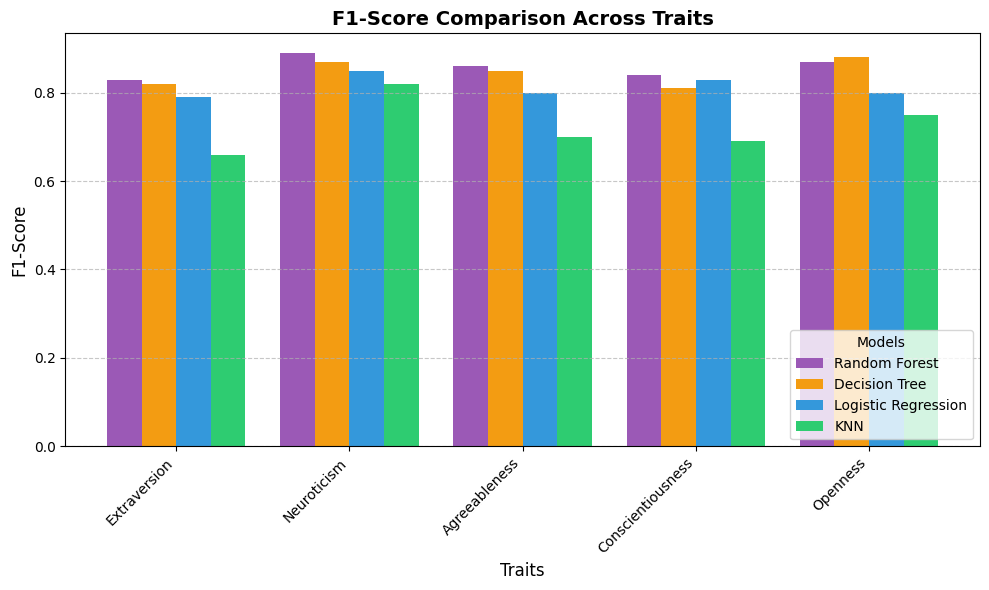

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
traits = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
random_forest_scores = [0.83, 0.89, 0.86, 0.84, 0.87]
decision_tree_scores = [0.82, 0.87, 0.85, 0.81, 0.88]
logistic_regression_scores = [0.79, 0.85, 0.8, 0.83, 0.8]
knn_scores = [0.66, 0.82, 0.7, 0.69, 0.75]

# Configuración del gráfico
x = np.arange(len(traits))  # Posiciones en el eje X
width = 0.2  # Ancho de las barras

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Random Forest
ax.bar(x - 1.5 * width, random_forest_scores, width, label='Random Forest', color='#9b59b6')

# Decision Tree
ax.bar(x - 0.5 * width, decision_tree_scores, width, label='Decision Tree', color='#f39c12')

# Logistic Regression
ax.bar(x + 0.5 * width, logistic_regression_scores, width, label='Logistic Regression', color='#3498db')

# KNN
ax.bar(x + 1.5 * width, knn_scores, width, label='KNN', color='#2ecc71')

# Personalización
ax.set_xlabel('Traits', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('F1-Score Comparison Across Traits', fontsize=14, weight='bold')
plt.ylim(0.6, 0.9)
ax.set_xticks(x)
ax.set_xticklabels(traits, rotation=45, ha='right')

# Leyenda en la parte inferior derecha
ax.legend(title='Models', loc='lower right')

# Añadir la cuadrícula
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

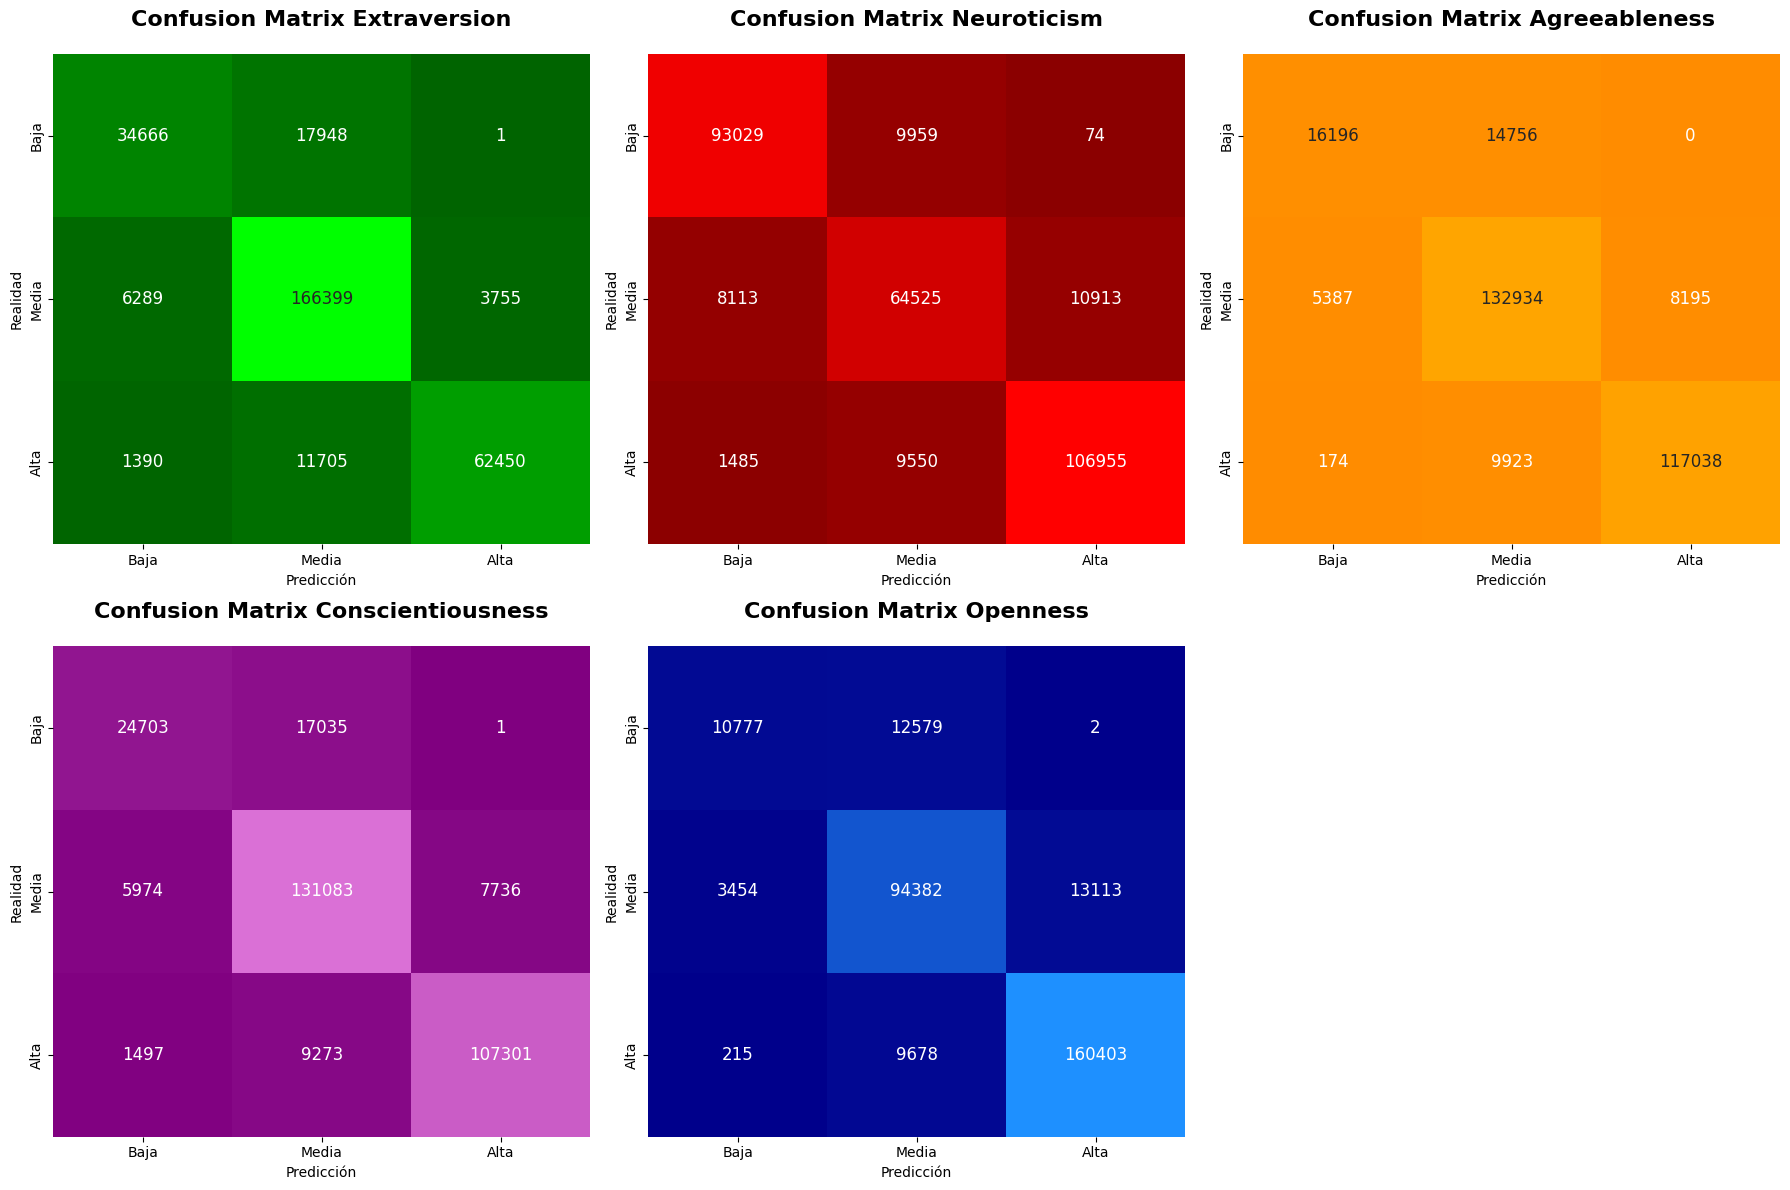

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# Crear una lista de las matrices de confusión
conf_matrices = [
    confusion_matrix(y_test_ext, y_pred_ext),
    confusion_matrix(y_test_est, y_pred_est),
    confusion_matrix(y_test_agr, y_pred_agr),
    confusion_matrix(y_test_csn, y_pred_csn),
    confusion_matrix(y_test_opn, y_pred_opn)
]

# Nombres para cada rasgo
features = ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']

# Crear mapas de colores personalizados (verde, rojo, naranja, morado, azul)
colors = [
    LinearSegmentedColormap.from_list("green", ["#006400", "#00FF00"]),  # Verde oscuro a verde claro
    LinearSegmentedColormap.from_list("red", ["#8B0000", "#FF0000"]),    # Rojo oscuro a rojo brillante
    LinearSegmentedColormap.from_list("orange", ["#FF8C00", "#FFA500"]), # Naranja
    LinearSegmentedColormap.from_list("purple", ["#800080", "#DA70D6"]), # Morado oscuro a morado claro
    LinearSegmentedColormap.from_list("blue", ["#00008B", "#1E90FF"])    # Azul oscuro a azul claro
]

# Crear una figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Asegurarse de que la cuadrícula tiene solo 5 subgráficas (eliminamos la subgráfica vacía)
axes = axes.ravel()

# Iterar sobre las matrices de confusión y los colores
for i, (conf_matrix, cmap, feature) in enumerate(zip(conf_matrices, colors, features)):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap,
                xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"],
                ax=axes[i], cbar=False, annot_kws={'size': 12})  # Ajustar tamaño de texto
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Realidad')
    
    # Subrayar el título con una línea debajo
    axes[i].set_title(f'Confusion Matrix {feature}', fontsize=16, fontweight='bold', pad=20)
    
    # Añadir una línea debajo del título para simular el subrayado
    axes[i].plot([0, 1], [1.05, 1.05], color='black', lw=2, transform=axes[i].transAxes)

# Eliminar la subgráfica vacía (la última posición)
fig.delaxes(axes[-1])

# Ajustar el diseño para que no se solapen los títulos y etiquetas
plt.tight_layout()
plt.show()


### VALIDACIÓ CREUADA: trobem el millor model amb els hiperparametres per defecte.

En el nostre cas és millor utilitzar la StratifiedKFold, ja que garanteix que cada "fold" tingui una distribució similar de la classe objectiu (la proporció de supervivents i no supervivents es manté constant).

Com funciona?
Exemple amb k = 5 folds:
- Iteració 1: El model s'entrena amb els folds 2, 3, 4, i 5, i es valida amb el fold 1.
- Iteració 2: El model s'entrena amb els folds 1, 3, 4, i 5, i es valida amb el fold 2.
- Iteració 3: El model s'entrena amb els folds 1, 2, 4, i 5, i es valida amb el fold 3.
- Iteració 4: El model s'entrena amb els folds 1, 2, 3, i 5, i es valida amb el fold 4.
- Iteració 5: El model s'entrena amb els folds 1, 2, 3, i 4, i es valida amb el fold 5.

### EXTRAVERSION

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    scores_ext = cross_val_score(model, X_train_ext, y_train_ext, cv = StratifiedKFold(n_splits = 5), scoring = 'f1_weighted')    
    print(f'{name}: F1 score mitjana en CV = {scores_ext.mean():.4f}')
    print('Standard deviation: ',str(np.std(scores_ext)*100)[:5] +'%')


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: F1 score mitjana en CV = 0.8027
Standard deviation:  1.912%
Decision Tree Classifier: F1 score mitjana en CV = 0.8105
Standard deviation:  0.123%


KeyboardInterrupt: 

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    scores_ext = cross_val_score(model, X_train_ext, y_train_ext, cv = StratifiedKFold(n_splits = 5), scoring = 'f1_weighted')    
    print(f'{name}: F1 score mitjana en CV = {scores_ext.mean():.4f}')
    print('Standard deviation: ',str(np.std(scores_ext)*100)[:5] +'%')


Random Forest: F1 score mitjana en CV = 0.8231
Standard deviation:  0.186%


Logistic Regression: F1 score mitjana en CV = 0.8029
Decision Tree Classifier: F1 score mitjana en CV = 0.8107
Random Forest: F1 score mitjana en CV = 0.8238
KNN: F1 score mitjana en CV = 0.6525

### NEUROTICISM

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    scores_est = cross_val_score(model, X_train_est, y_train_est, cv = StratifiedKFold(n_splits = 5), scoring = 'f1_weighted')    
    print(f'{name}: F1 score mitjana en CV = {scores_est.mean():.4f}')
    print('Standard deviation: ',str(np.std(scores_est)*100)[:5] +'%')


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: F1 score mitjana en CV = 0.8561
Standard deviation:  0.395%
Decision Tree Classifier: F1 score mitjana en CV = 0.8605
Standard deviation:  0.174%
Random Forest: F1 score mitjana en CV = nan
Standard deviation:  nan%


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\L

### AGREEABLENESS

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    scores_agr = cross_val_score(model, X_train_agr, y_train_agr, cv = StratifiedKFold(n_splits = 5), scoring = 'f1_weighted')    
    print(f'{name}: F1 score mitjana en CV = {scores_agr.mean():.4f}')
    print('Standard deviation: ',str(np.std(scores_agr)*100)[:5] +'%')


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: F1 score mitjana en CV = 0.7806
Standard deviation:  0.607%
Decision Tree Classifier: F1 score mitjana en CV = 0.8446
Standard deviation:  0.101%
Random Forest: F1 score mitjana en CV = 0.8513
Standard deviation:  0.132%


### CONSCIENTIOUSNESS

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    scores_csn = cross_val_score(model, X_train_csn, y_train_csn, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted')
    print(f'{name}: F1 score mitjana en CV = {scores_csn.mean():.4f}')
    print('Standard deviation: ', str(np.std(scores_csn) * 100)[:5] + '%')


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: F1 score mitjana en CV = 0.7856
Standard deviation:  0.756%


KeyboardInterrupt: 

### OPENNESS

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    scores_opn = cross_val_score(model, X_train_opn, y_train_opn, cv = StratifiedKFold(n_splits = 5), scoring = 'f1_weighted')    
    print(f'{name}: F1 score mitjana en CV = {scores_opn.mean():.4f}')
    print('Standard deviation: ',str(np.std(scores_opn)*100)[:5] +'%')


### PROVAS QUE NO VAN SALIR BÉ PEL COST COMPUTACIONAL

In [ ]:
from sklearn.linear_model import Lasso,Ridge
# rang d'hiperparametres
param_grid_ridge = {'alpha': np.logspace(-4, 4, 10)  
                    }

param_grid_lasso = {'alpha': np.logspace(-4, 4, 10)  
                    }

# GridSearchCV per a Lasso
lasso_grid_search = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='f1_weighted')
lasso_grid_search.fit(X_train_ext, y_train_ext)


# GridSearchCV per a Ridge
ridge_grid_search = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='f1_weighted')
ridge_grid_search.fit(X_train_ext, y_train_ext)

print("\nMillors hiperparàmetres para Lasso:", lasso_grid_search.best_params_)

print("\nMillors hiperparámetres para Ridge:", ridge_grid_search.best_params_)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self.

KeyboardInterrupt: 

In [ ]:
#provem amb Ridge i Lasso, a més d'utilitzar RandomizedSearchCV ja que té una millor eficiència en dades grans
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'C': np.arange(0.1,3,0.1),  # Regularització
    'penalty': ['l1'],# Tipus de penalització ('l1', 'l2')
    'solver': ['liblinear', 'saga'] # Algoritmes compatibles amb l2
}

lr = LogisticRegression()

start_time = time.time()
rand_search_log = RandomizedSearchCV(lr, param_grid, scoring='f1_weighted', cv = StratifiedKFold(n_splits = 5), verbose=3, n_jobs=1)
rand_search_log.fit(X_train_ext, y_train_ext)
end_time = time.time() 

elapsed_time = end_time - start_time
print(f"Temps d'execució: {elapsed_time} segons")
print(f'Millors hiperparàmetres: {rand_search_log.best_params_}')
print(f'Millor score: {rand_search_log.best_score_:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1.1, penalty=l1, solver=liblinear;, score=0.839 total time=23.7min
[CV 2/5] END C=1.1, penalty=l1, solver=liblinear;, score=0.839 total time=20.8min
[CV 3/5] END C=1.1, penalty=l1, solver=liblinear;, score=0.838 total time=11.3min
[CV 4/5] END C=1.1, penalty=l1, solver=liblinear;, score=0.839 total time=10.7min
[CV 5/5] END C=1.1, penalty=l1, solver=liblinear;, score=0.837 total time=10.8min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=2.5000000000000004, penalty=l1, solver=saga;, score=0.749 total time= 3.0min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=2.5000000000000004, penalty=l1, solver=saga;, score=0.749 total time= 3.1min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=2.5000000000000004, penalty=l1, solver=saga;, score=0.749 total time= 3.0min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=2.5000000000000004, penalty=l1, solver=saga;, score=0.750 total time= 3.0min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=2.5000000000000004, penalty=l1, solver=saga;, score=0.749 total time= 2.9min
[CV 1/5] END C=0.9, penalty=l1, solver=liblinear;, score=0.839 total time=10.4min
[CV 2/5] END C=0.9, penalty=l1, solver=liblinear;, score=0.839 total time=10.9min
[CV 3/5] END C=0.9, penalty=l1, solver=liblinear;, score=0.838 total time=11.0min
[CV 4/5] END C=0.9, penalty=l1, solver=liblinear;, score=0.839 total time=11.3min
[CV 5/5] END C=0.9, penalty=l1, solver=liblinear;, score=0.838 total time=12.2min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.749 total time= 3.0min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.749 total time= 3.1min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.749 total time= 3.1min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.750 total time= 3.1min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=0.5, penalty=l1, solver=saga;, score=0.749 total time= 3.1min
[CV 1/5] END C=1.5000000000000002, penalty=l1, solver=liblinear;, score=0.839 total time=10.9min
[CV 2/5] END C=1.5000000000000002, penalty=l1, solver=liblinear;, score=0.839 total time=11.1min
[CV 3/5] END C=1.5000000000000002, penalty=l1, solver=liblinear;, score=0.838 total time=11.4min
[CV 4/5] END C=1.5000000000000002, penalty=l1, solver=liblinear;, score=0.839 total time=67.5min


In [ ]:
best_model = LogisticRegression(C=1.1, penalty='l1', solver='liblinear')
best_model.fit(X_train_ext, y_train_ext)
y_pred = best_model.predict(X_test_ext)
print(classification_report(y_test_ext, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69     52615
           1       0.81      0.96      0.88    176443
           2       0.94      0.76      0.84     75545

    accuracy                           0.85    304603
   macro avg       0.88      0.77      0.80    304603
weighted avg       0.86      0.85      0.84    304603



In [ ]:
#provem amb Ridge i Lasso, a més d'utilitzar RandomizedSearchCV ja que té una millor eficiència en dades grans
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'C': np.arange(0.1,3,0.1),  # Regularització
    'penalty': ['l2'],# Tipus de penalització ('l1', 'l2')
    'solver': ['liblinear'] # Algoritmes compatibles amb l2, no afegim saga perque ja hem vist que no és eficient
    
}

lr = LogisticRegression()

start_time = time.time()
rand_search_log2 = RandomizedSearchCV(lr, param_grid, scoring='f1_weighted', cv = StratifiedKFold(n_splits = 5), verbose=3, n_jobs=1)
rand_search_log2.fit(X_train_ext, y_train_ext)
end_time = time.time() 

elapsed_time = end_time - start_time
print(f"Temps d'execució: {elapsed_time} segons")
print(f'Millors hiperparàmetres: {rand_search_log2.best_params_}')
print(f'Millor score: {rand_search_log2.best_score_:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.5, penalty=l2, solver=liblinear;, score=0.801 total time= 5.7min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.5, penalty=l2, solver=liblinear;, score=0.809 total time= 5.2min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.5, penalty=l2, solver=liblinear;, score=0.810 total time= 5.3min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.5, penalty=l2, solver=liblinear;, score=0.812 total time= 5.7min


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.5, penalty=l2, solver=liblinear;, score=0.812 total time= 5.2min


KeyboardInterrupt: 

In [ ]:
def rand_graph(rand, hue=None):
    # Obtener los resultados de cv_results_ y crear un dataframe
    df_tmp = pd.DataFrame(rand.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False)
    
    # Extraer los parámetros en columnas separadas
    param_cols = df_tmp['params'].apply(pd.Series)
    df_summary = pd.concat([param_cols, df_tmp['mean_test_score']], axis=1)
    
    # Renombrar las columnas para claridad
    df_summary.columns = list(param_cols.columns) + ['mean_test_score']
    
    # Mostrar las primeras filas
    print(df_summary.head())
    
    # Crear un gráfico de barras para las puntuaciones (mejor que pairplot para este contexto)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='mean_test_score', y=df_summary.index, data=df_summary, palette="viridis")
    plt.title('Comparison of Mean Test Scores for Different Hyperparameter Combinations')
    plt.xlabel('Mean Test Score')
    plt.ylabel('Hyperparameter Combinations')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje X
    plt.tight_layout()
    plt.show()


In [ ]:
def grid_graph(grid, hue=None):
    df_tmp = pd.DataFrame(pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

    df_summary = pd.DataFrame()
    mn_ts_scores = []
    for i, row in df_tmp.iterrows():
        mn_ts_scores.append(row[1])
        df_tmp = pd.DataFrame(row[0], index=[0])
        df_summary = pd.concat([df_summary, df_tmp])
    df_summary['mean test score'] = mn_ts_scores
    df_summary = df_summary.reset_index(drop=True)
    #print(df_summary.head())
    #print(df_summary.columns)
    sns.pairplot(data=df_summary, hue=hue, height=1.5, aspect=1.2)
    bplt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criteris de divisió
    'max_depth': [None, 30, 50],  # Profunditat màxima de l'arbre
    'min_samples_split': [2, 5, 10],  # Mínim de mostres per dividir un node
    'min_samples_leaf': [1, 2, 4],  # Mínim de mostres per fulla
}
dt = DecisionTreeClassifier()

start_time = time.time()
grid_search_dt = RandomizedSearchCV(dt, param_grid, n_iter=20, scoring='f1_weighted', cv = StratifiedKFold(n_splits = 4), verbose=3, n_jobs=1)
grid_search_dt.fit(X_train_ext, y_train_ext)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps d'execució: {elapsed_time} segons")
print(f'Millors hiperparàmetres: {grid_search_dt.best_params_}')
print(f'Millor score: {grid_search_dt.best_score_:.4f}')

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV 1/4] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.807 total time= 1.7min
[CV 2/4] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.809 total time= 1.5min
[CV 3/4] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.808 total time= 1.5min
[CV 4/4] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.809 total time= 1.5min
[CV 1/4] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.822 total time= 1.6min
[CV 2/4] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.821 total time= 1.5min
[CV 3/4] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.822 total time= 1.5min
[CV 4/4] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2;, score=0.821 to

    min_samples_split  min_samples_leaf  max_depth criterion  mean_test_score
3                  10                 4       50.0   entropy         0.824935
14                  2                 4        NaN   entropy         0.824504
16                  2                 4       50.0   entropy         0.824475
19                  2                 1       50.0   entropy         0.822096
2                   2                 1       30.0   entropy         0.822053


C:\Users\adria\AppData\Local\Temp\ipykernel_30320\2072776201.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean_test_score', y=df_summary.index, data=df_summary, palette="viridis")


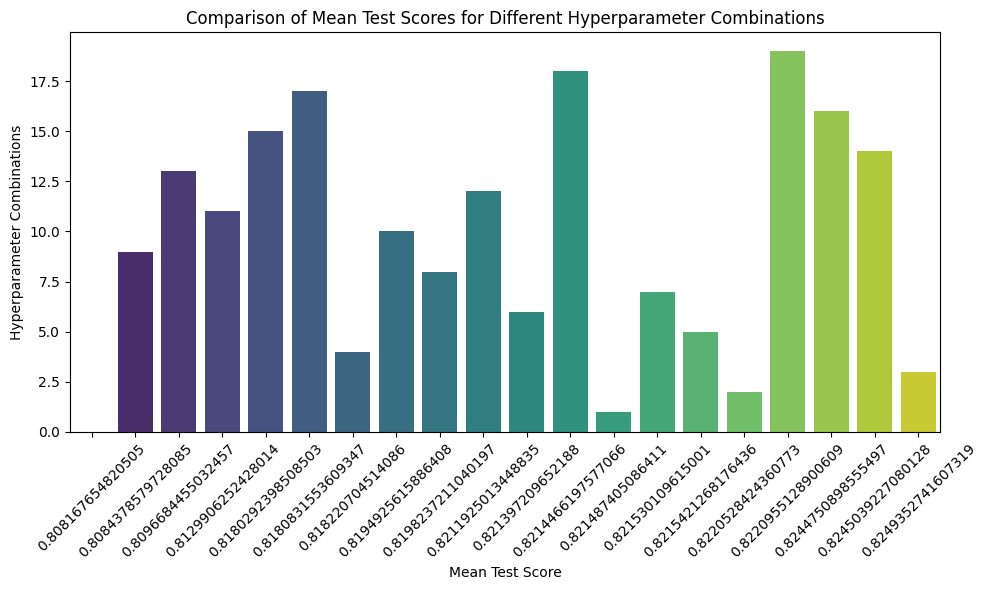

In [ ]:
rand_graph(grid_search_dt, 'criterion')

In [ ]:
from sklearn.model_selection import train_test_split

# Espacio de búsqueda ajustado
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini','log_loss', 'entropy']
}

# RandomizedSearchCV ajustado
rf = RandomForestClassifier()
start_time = time.time()

grid_search_rf = RandomizedSearchCV(
    rf,
    param_grid,
    scoring='f1_weighted',
    cv=4,  # Reducimos el número de folds
    verbose=3,
    n_jobs=1,  # Máxima paralelización
    n_iter=10    # Probamos menos combinaciones
)

# Ajustar el modelo con la muestra
grid_search_rf.fit(X_train_ext, y_train_ext)

end_time = time.time()
elapsed_time = end_time - start_time

# Resultados
print(f"Temps d'execució: {elapsed_time:.2f} segons")
print(f'Millors hiperparàmetres per Random Forest: {grid_search_rf.best_params_}')
print(f'Millor score: {grid_search_rf.best_score_:.4f}')


Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=200;, score=nan total time=  21.1s
[CV 2/4] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=200;, score=nan total time=   9.4s
[CV 3/4] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=200;, score=nan total time=   5.2s
[CV 4/4] END criterion=gini, max_depth=None, min_samples_split=5, n_estimators=200;, score=nan total time=   7.7s
[CV 1/4] END criterion=entropy, max_depth=None, min_samples_split=10, n_estimators=150;, score=nan total time=   1.0s
[CV 2/4] END criterion=entropy, max_depth=None, min_samples_split=10, n_estimators=150;, score=nan total time=   1.5s
[CV 3/4] END criterion=entropy, max_depth=None, min_samples_split=10, n_estimators=150;, score=nan total time=   2.1s
[CV 4/4] END criterion=entropy, max_depth=None, min_samples_split=10, n_estimators=150;, score=nan total time=   1.5s
[CV 1/4] EN

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 2152, in __array__
    values = self._values
             ^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py", line 1127, in _values
    return ensure_wrapped_if_datetimelike(self.values)
                                          ^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py", line 12664, in values
    return self._mgr.as_array()
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 1694, in as_array
    arr = self._interleave(dtype=dtype, na_value=na_value)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 1727, in _interleave
    result = np.empty(self.shape, dtype=dtype)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy._core._exceptions._ArrayMemoryError: Unable to allocate 435. MiB for an array with shape (107, 533053) and data type float64

--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 2152, in __array__
    values = self._values
             ^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py", line 1127, in _values
    return ensure_wrapped_if_datetimelike(self.values)
                                          ^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py", line 12664, in values
    return self._mgr.as_array()
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 1694, in as_array
    arr = self._interleave(dtype=dtype, na_value=na_value)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\internals\managers.py", line 1727, in _interleave
    result = np.empty(self.shape, dtype=dtype)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
numpy._core._exceptions._ArrayMemoryError: Unable to allocate 435. MiB for an array with shape (107, 533054) and data type float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
# Espacio de búsqueda ajustado
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini','log_loss', 'entropy']
}

# RandomizedSearchCV ajustado
rf = RandomForestClassifier()
start_time = time.time()

grid_search_rfest = RandomizedSearchCV(
    rf,
    param_grid,
    scoring='f1_weighted',
    cv=4,  # Reducimos el número de folds
    verbose=3,
    n_jobs=1,  # Máxima paralelización
    n_iter=3    # Probamos menos combinaciones
)

# Ajustar el modelo con la muestra
grid_search_rfest.fit(X_train_est, y_train_est)

end_time = time.time()
elapsed_time = end_time - start_time

# Resultados
print(f"Temps d'execució: {elapsed_time:.2f} segons")
print(f'Millors hiperparàmetres per Random Forest: {grid_search_rfest.best_params_}')
print(f'Millor score: {grid_search_rfest.best_score_:.4f}')


Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 1/4] END criterion=gini, max_depth=10, min_samples_split=10, n_estimators=50;, score=0.864 total time= 2.2min
[CV 2/4] END criterion=gini, max_depth=10, min_samples_split=10, n_estimators=50;, score=0.863 total time= 2.4min
[CV 3/4] END criterion=gini, max_depth=10, min_samples_split=10, n_estimators=50;, score=0.864 total time= 3.9min
[CV 4/4] END criterion=gini, max_depth=10, min_samples_split=10, n_estimators=50;, score=0.862 total time= 2.1min
[CV 1/4] END criterion=log_loss, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.888 total time= 4.7min
[CV 2/4] END criterion=log_loss, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.886 total time= 4.8min
[CV 3/4] END criterion=log_loss, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.889 total time= 5.0min
[CV 4/4] END criterion=log_loss, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.888 total time= 5.1min
[CV 1/4]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y_est, test_size=0.3, random_state=42)

# Inicializar el modelo Random Forest con los hiperparámetros dados
rf_model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=10,
    max_depth=20,
    criterion='entropy',
    random_state=42
)

# Entrenar el modelo
rf_model.fit(X_train_rf, y_train_rf)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluación del modelo
print("Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))

f1 = f1_score(y_test_rf, y_pred_rf, average='weighted')
print(f"F1 Score (weighted): {f1:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92    102854
           1       0.80      0.81      0.80     83276
           2       0.93      0.93      0.93    118473

    accuracy                           0.89    304603
   macro avg       0.88      0.88      0.88    304603
weighted avg       0.89      0.89      0.89    304603

Confusion Matrix:
[[ 94026   8802     26]
 [  7592  67246   8438]
 [    32   8435 110006]]
F1 Score (weighted): 0.8908


In [ ]:
from sklearn.model_selection import train_test_split

# Espacio de búsqueda ajustado
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini','log_loss', 'entropy']
}

# RandomizedSearchCV ajustado
rf = RandomForestClassifier()
start_time = time.time()

grid_search_rfagr = RandomizedSearchCV(
    rf,
    param_grid,
    scoring='f1_weighted',
    cv=4,  # Reducimos el número de folds
    verbose=3,
    n_jobs=1,  # Máxima paralelización
    n_iter=1'    # Probamos menos combinaciones
)

# Ajustar el modelo con la muestra
grid_search_rfagr.fit(X_train_agr, y_train_agr)

end_time = time.time()
elapsed_time = end_time - start_time

# Resultados
print(f"Temps d'execució: {elapsed_time:.2f} segons")
print(f'Millors hiperparàmetres per Random Forest: {grid_search_rfagr.best_params_}')
print(f'Millor score: {grid_search_rfagr.best_score_:.4f}')


Fitting 4 folds for each of 3 candidates, totalling 12 fits


KeyboardInterrupt: 

In [ ]:
grid_graph(grid_search_rfagr)

In [ ]:
from sklearn.model_selection import train_test_split

# Espacio de búsqueda ajustado
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini','log_loss', 'entropy']
}

# RandomizedSearchCV ajustado
rf = RandomForestClassifier()
start_time = time.time()

grid_search_rfcsn = RandomizedSearchCV(
    rf,
    param_grid,
    scoring='f1_weighted',
    cv=4,  # Reducimos el número de folds
    verbose=3,
    n_jobs=1,  # Máxima paralelización
    n_iter=3    # Probamos menos combinaciones
)

# Ajustar el modelo con la muestra
grid_search_rfcsn.fit(X_train_csn, y_train_opn)

end_time = time.time()
elapsed_time = end_time - start_time

# Resultados
print(f"Temps d'execució: {elapsed_time:.2f} segons")
print(f'Millors hiperparàmetres per Random Forest: {grid_search_rfcsn.best_params_}')
print(f'Millor score: {grid_search_rfcsn.best_score_:.4f}')


In [ ]:
grid_graph(grid_search_rfcsn)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criteris de divisió
    'max_depth': [None, 30, 50],  # Profunditat màxima de l'arbre
    'min_samples_split': [2, 5, 10],  # Mínim de mostres per dividir un node
    'min_samples_leaf': [1, 2, 4],  # Mínim de mostres per fulla
}
dt = DecisionTreeClassifier()

start_time = time.time()
grid_search_dtopn = RandomizedSearchCV(dt, param_grid, n_iter=20, scoring='f1_weighted', cv = StratifiedKFold(n_splits = 4), verbose=3, n_jobs=1)
grid_search_dtopn.fit(X_train_opn, y_train_opn)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps d'execució: {elapsed_time} segons")
print(f'Millors hiperparàmetres: {grid_search_dtopn.best_params_}')
print(f'Millor score: {grid_search_dtopn.best_score_:.4f}')

In [ ]:

grid_graph(grid_search_dtopn)